In [1]:
import networkx as nx

from functions import *

In [2]:
from music21 import converter, environment

# Set the paths to MuseScore executable
env = environment.Environment()
env['musicxmlPath'] = 'C:\\Program Files\\MuseScore 4\\bin\\MuseScore4.exe'  # Path to MuseScore executable
env['musescoreDirectPNGPath'] = 'C:\\Program Files\\MuseScore 4\\bin\\MuseScore4.exe'  # Path to MuseScore executable

In [3]:
import music21
us = music21.environment.UserSettings()
us['musescoreDirectPNGPath'] = 'C:/Program Files/MuseScore 4/bin/MuseScore4.exe'

In [4]:
import pickle

## Functions Overview

### extract_score_elements
Extracts elements from a music21 score object and organizes them into a DataFrame.

### recreate_score
Recreates a music21 score object from a DataFrame of score elements.

### parse_score_elements
Parses a music21 score object into a DataFrame of note attributes and a list of note and chord elements.

### calculate_ir_symbol
Calculates the IR (Intervallic Relationship) symbol based on the intervals between notes.

### assign_ir_symbols
Assigns IR symbols and colors to each element in the score array.

### visualize_notes_with_symbols
Visualizes notes with their assigned IR symbols and colors in a music21 score.

### ir_symbols_to_matrix
Assigns IR symbols to the note matrix based on the note array.

### assign_ir_pattern_indices
Assigns pattern indices to the note matrix based on IR symbols.

### get_onset
Retrieves the onset times from the note matrix.

### get_duration
Retrieves the duration times from the note matrix.

### calculate_clang_boundaries
Calculates clang boundaries based on note matrix attributes.

### calculate_segment_boundaries
Calculates segment boundaries based on clang boundaries and note attributes.

### adjust_segment_boundaries
Adjusts segment boundaries to ensure IR patterns are not split.

### segmentgestalt
Segments the note matrix into meaningful groups based on IR patterns and boundaries.

### segments_to_distance_matrix
Converts segments to a distance matrix using multiprocessing.

### segments_to_graph
Converts segments to a k-NN graph and ensures connectivity.


# Usage
Current flow: \
converter.parse() output -> parse_score_elements() -> assign_ir_symbols -> ir_symbols_to_matrix -> assign_ir_pattern_indices -> segmentgestalt

In [5]:
# midi_file = '..\\bach_846.mid' # Hardcoded, for multiple songs, make a function to iterate thru folder
midi_file = "..\\Music Database\\bach_cello_suites\\Suite No. 5 in C minor\\cs5-1pre.mxl"
# midi_file = "..\\Music Database\\GTTM Database\\Georg Friedrich Händel\\Judas Maccabaeus HWV63 See the conquering hero comes.xml"
# midi_file = ".\\Music Database\\bach_cello_suites\\Suite No. 1 in G major\\cs1-1pre.mid"
midi_parsed = converter.parse(midi_file)
midi_parsed = midi_parsed.expandRepeats()
midi_parsed = midi_parsed.parts[0]

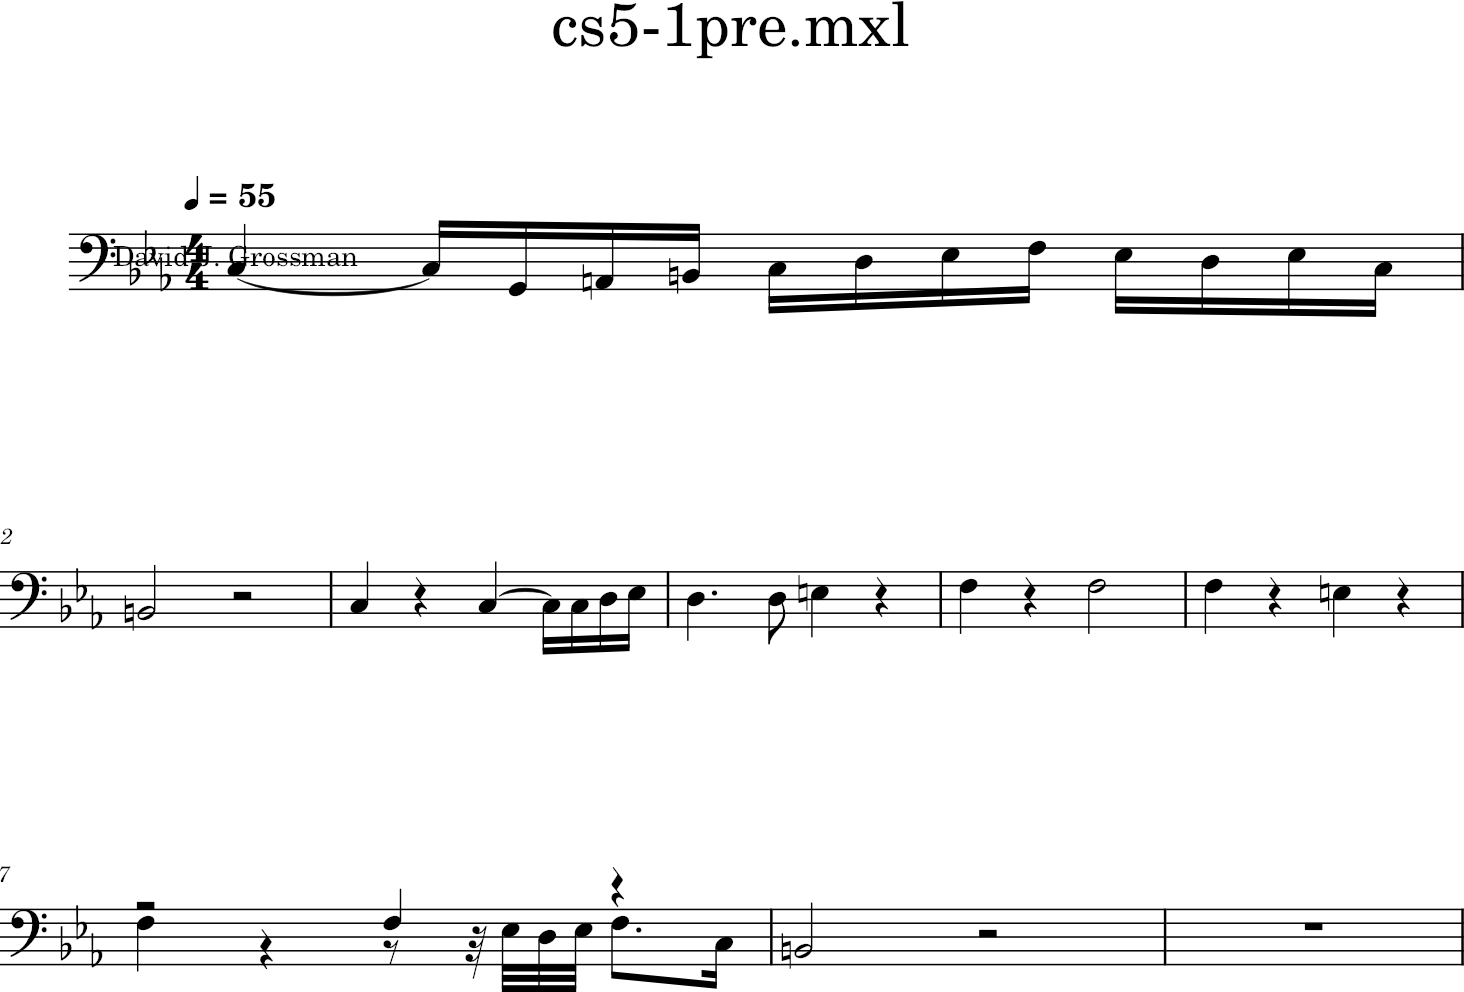

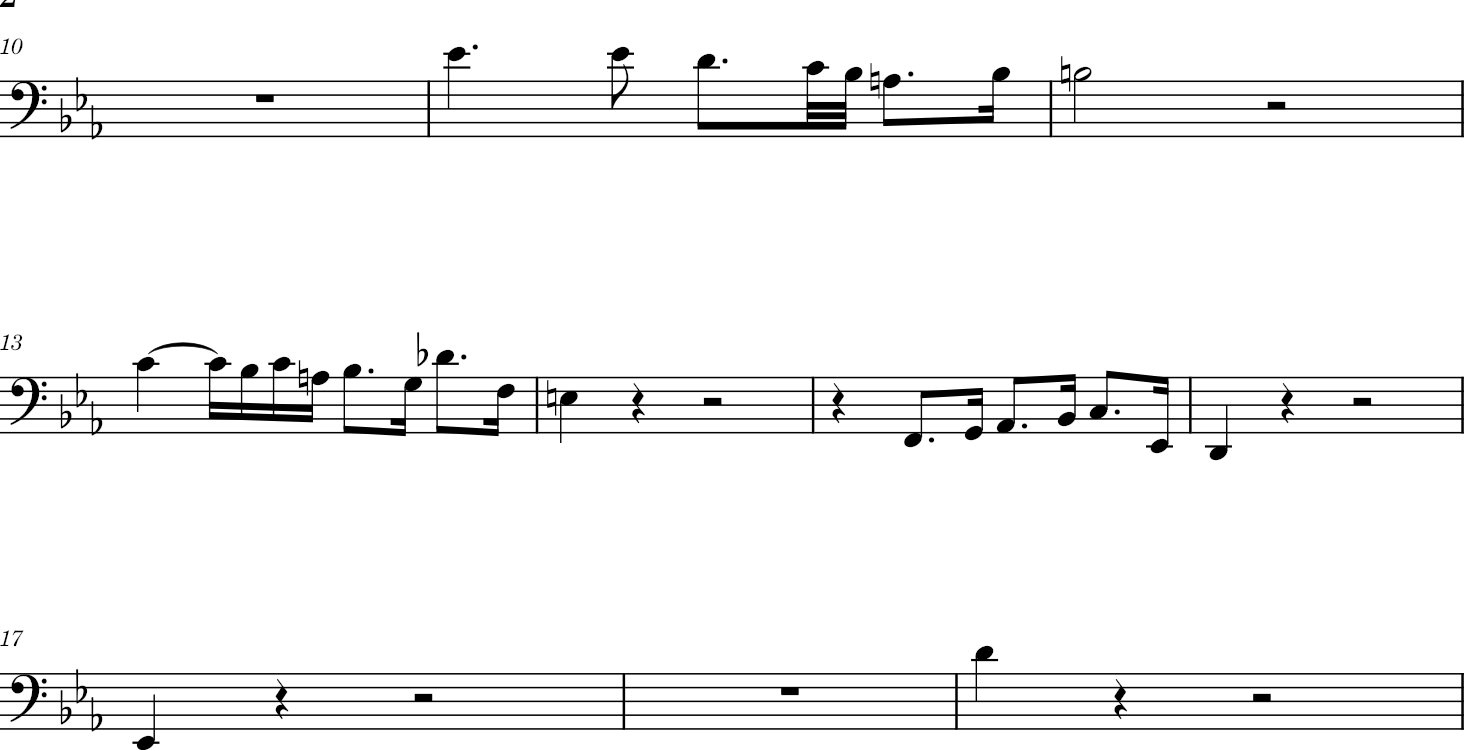

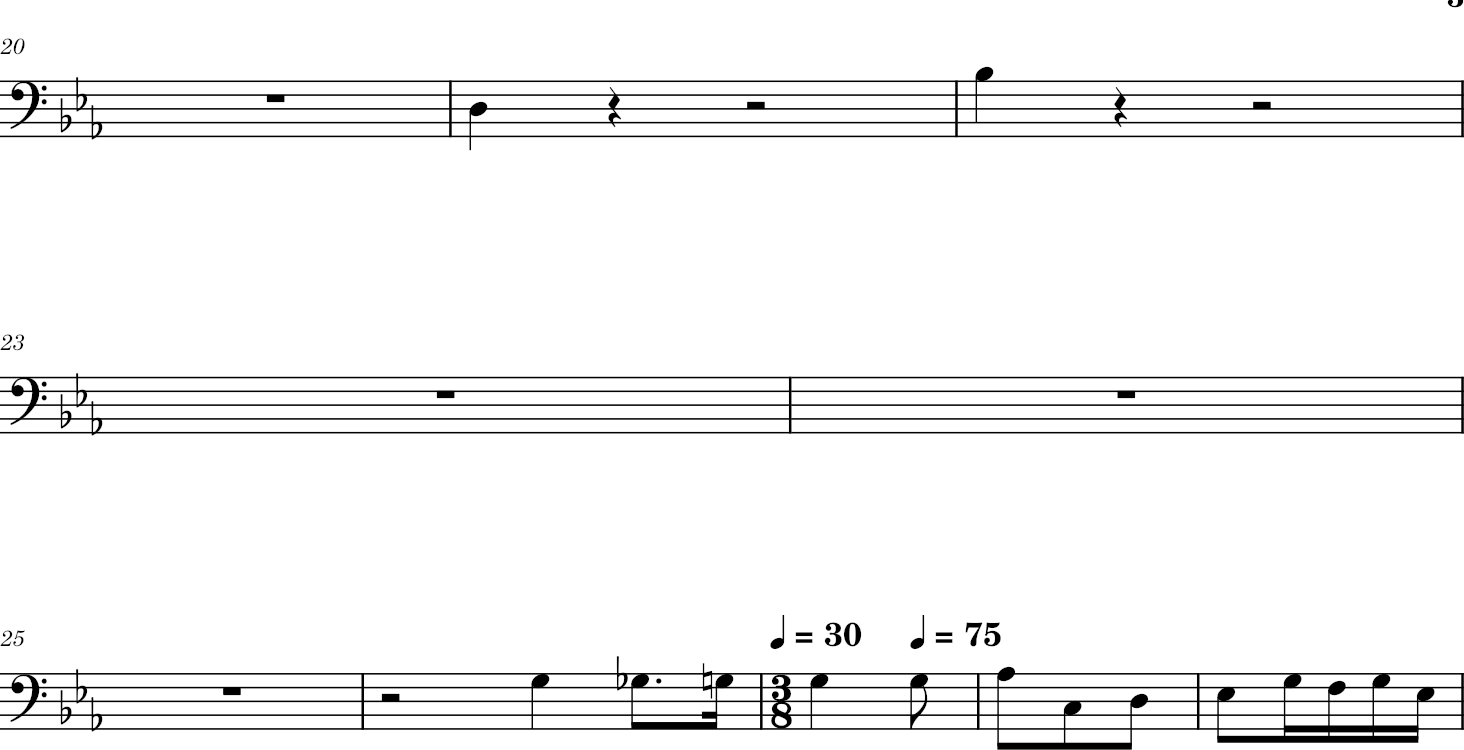

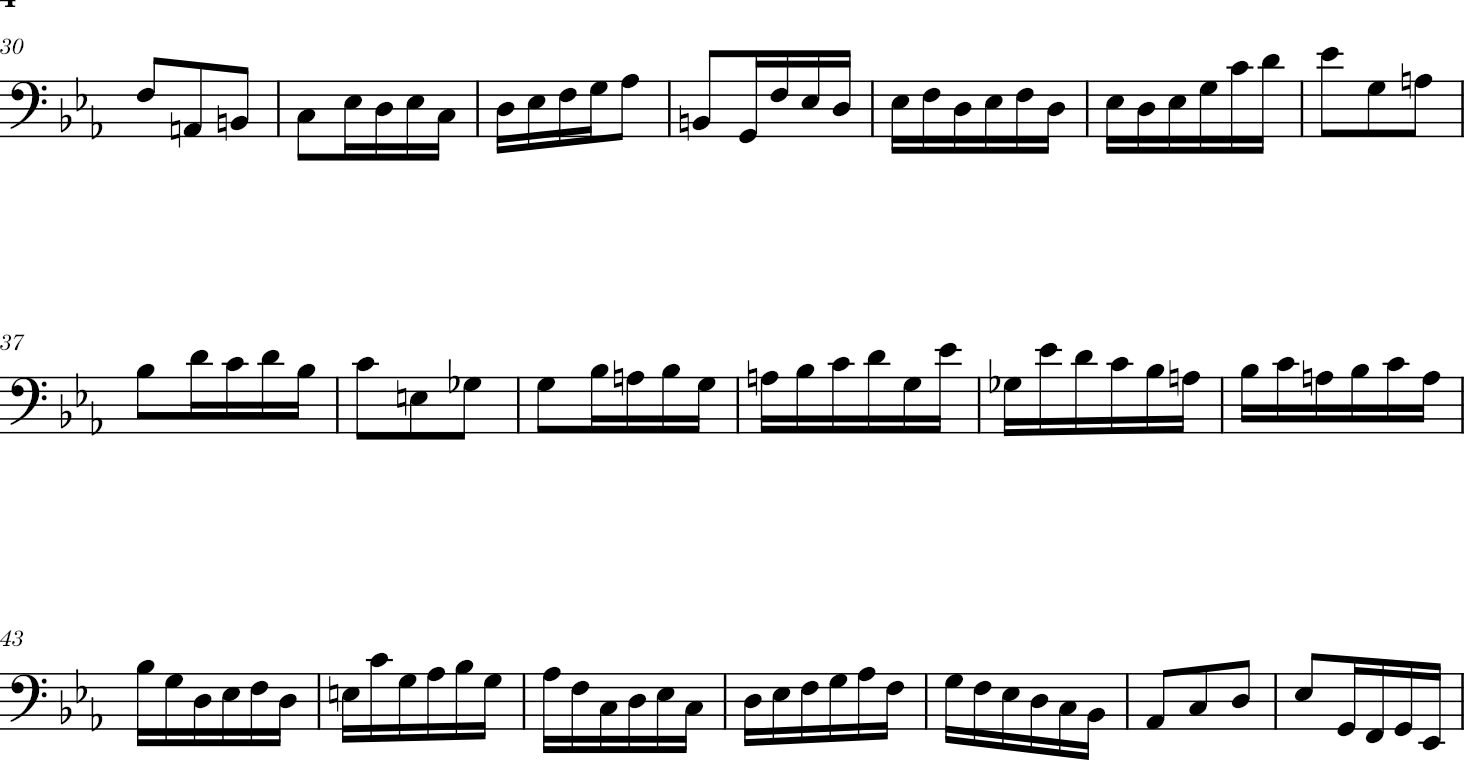

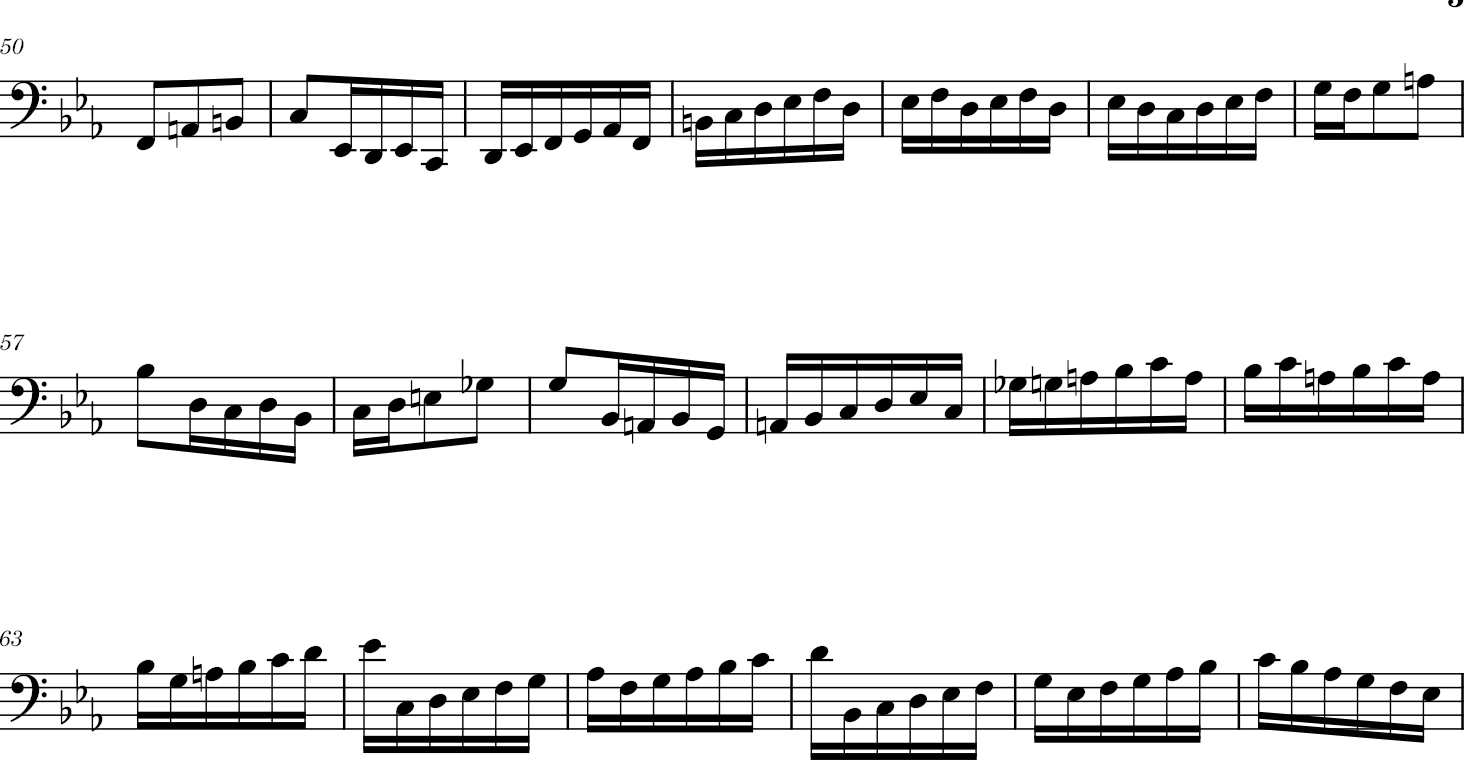

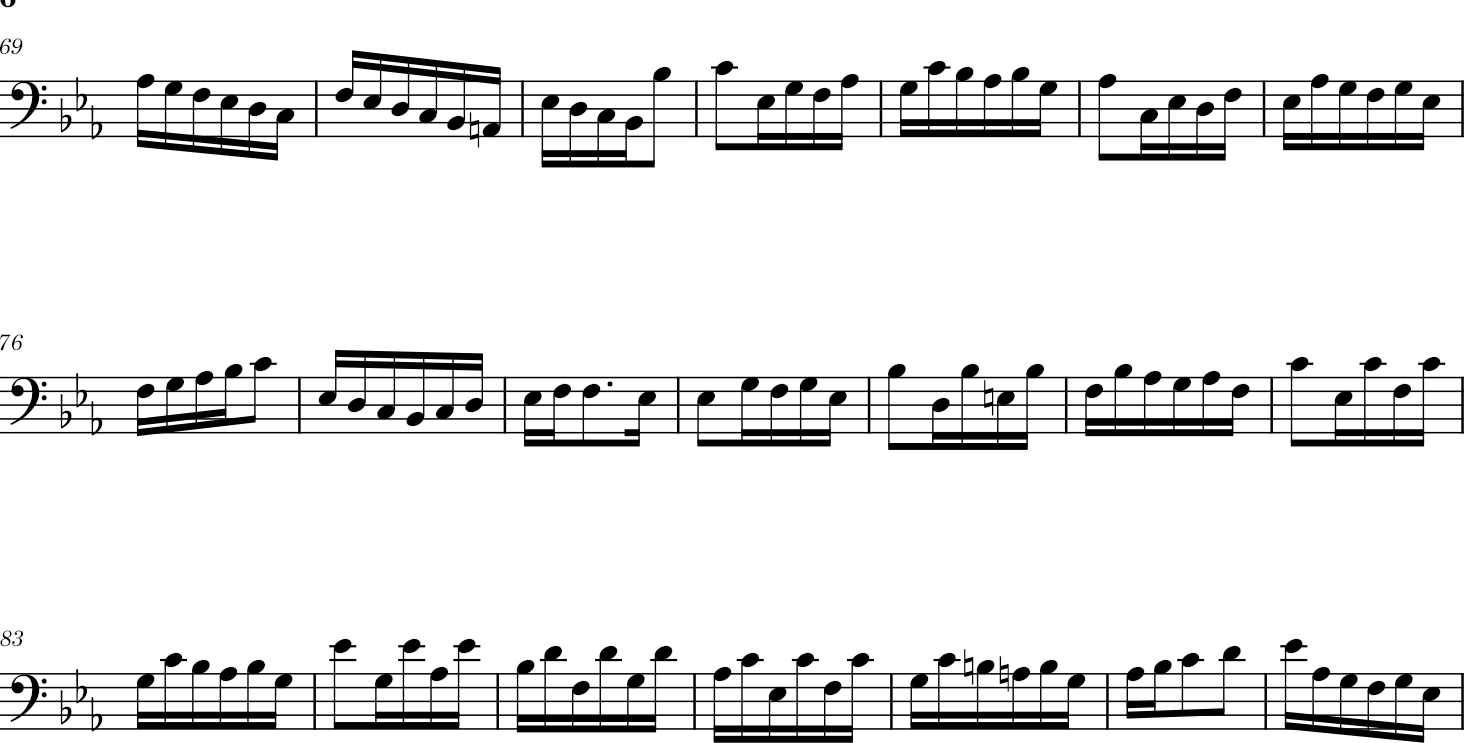

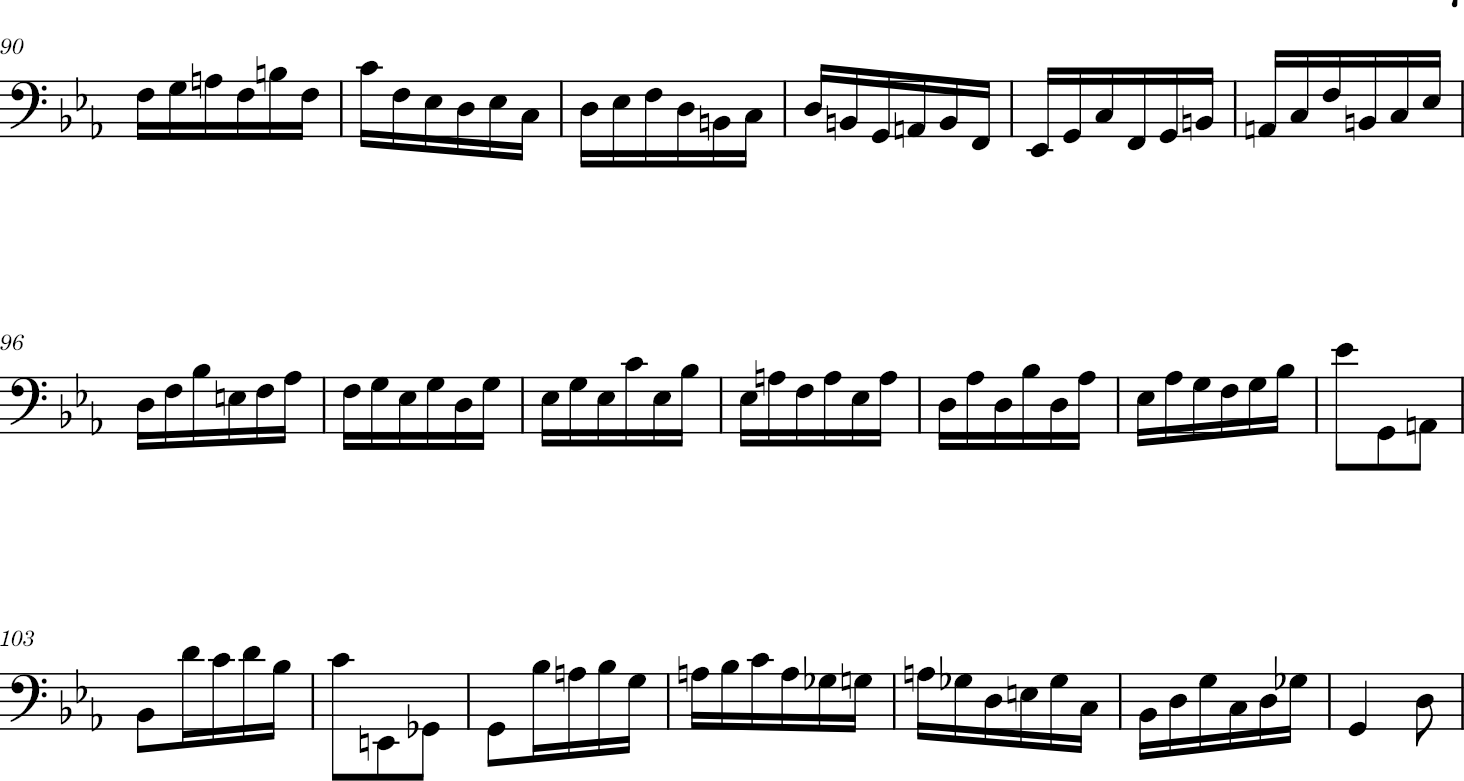

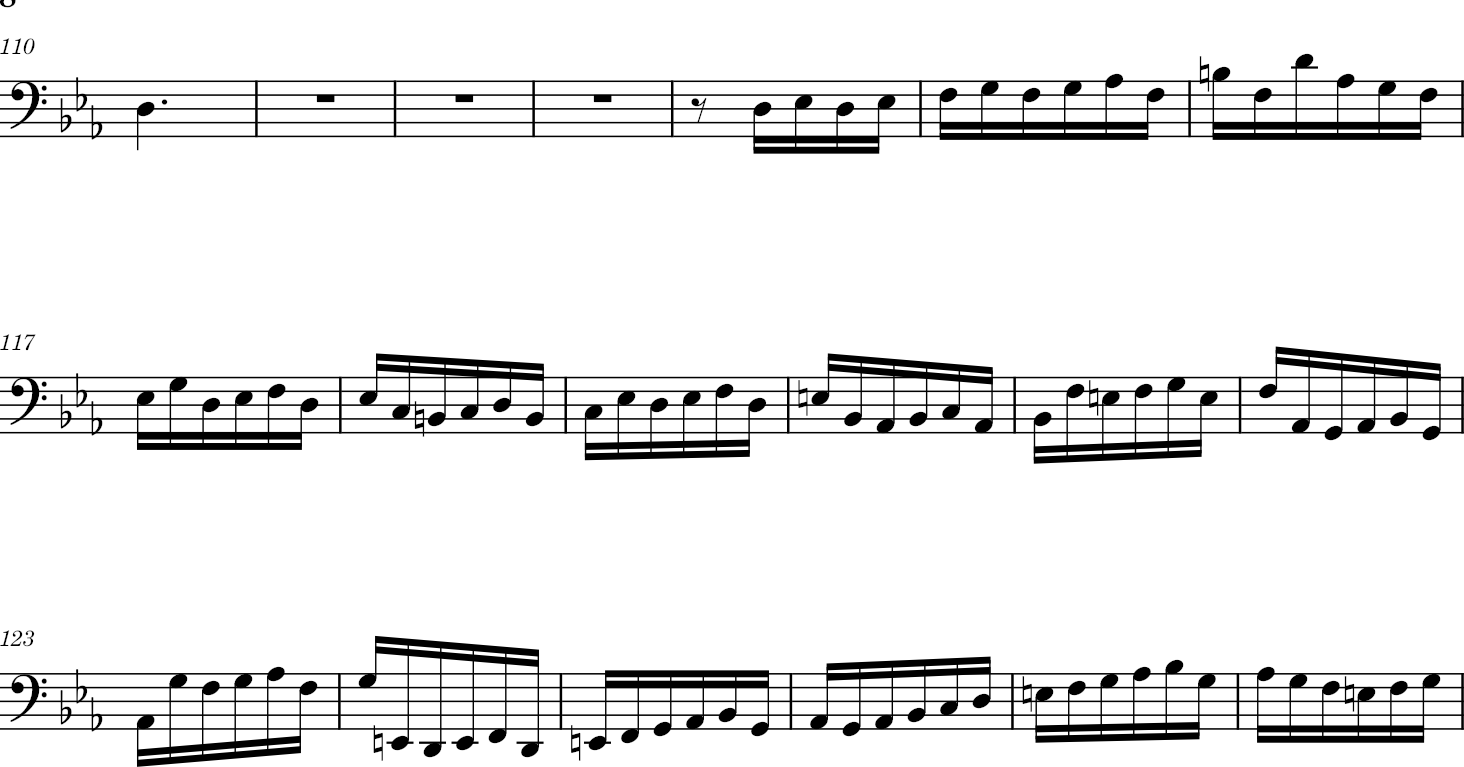

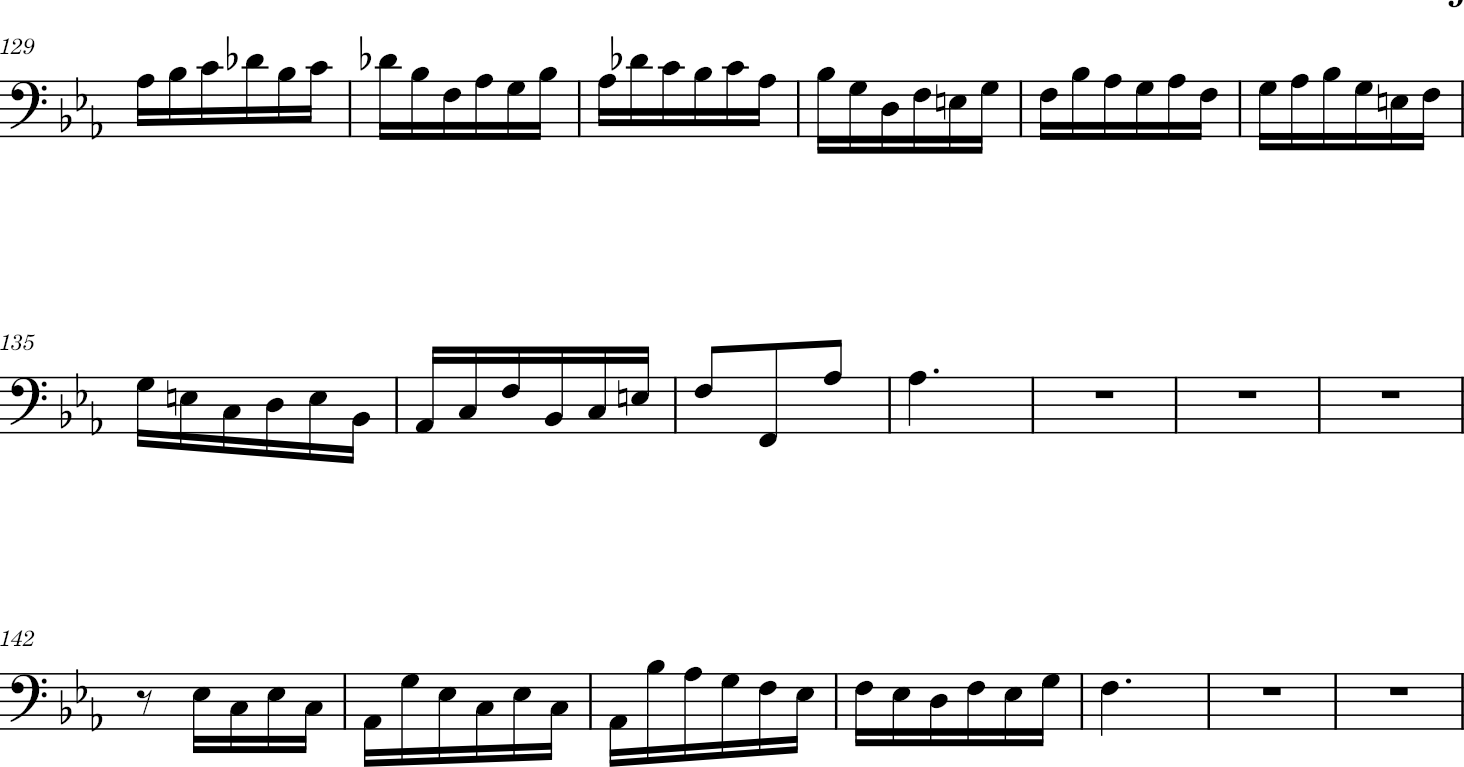

In [6]:
midi_parsed.show()

In [7]:
nmat, narr, sarr = parse_score_elements(midi_parsed)

AttributeError: 'Part' object has no attribute 'parts'

In [ ]:
ir_symbols = assign_ir_symbols(narr)

In [ ]:
ir_nmat = ir_symbols_to_matrix(ir_symbols, nmat)

In [99]:
ir_nmat = assign_ir_pattern_indices(ir_nmat)

In [100]:
segments = segmentgestalt(ir_nmat)

In [101]:
processed_segments = preprocess_segments(segments)

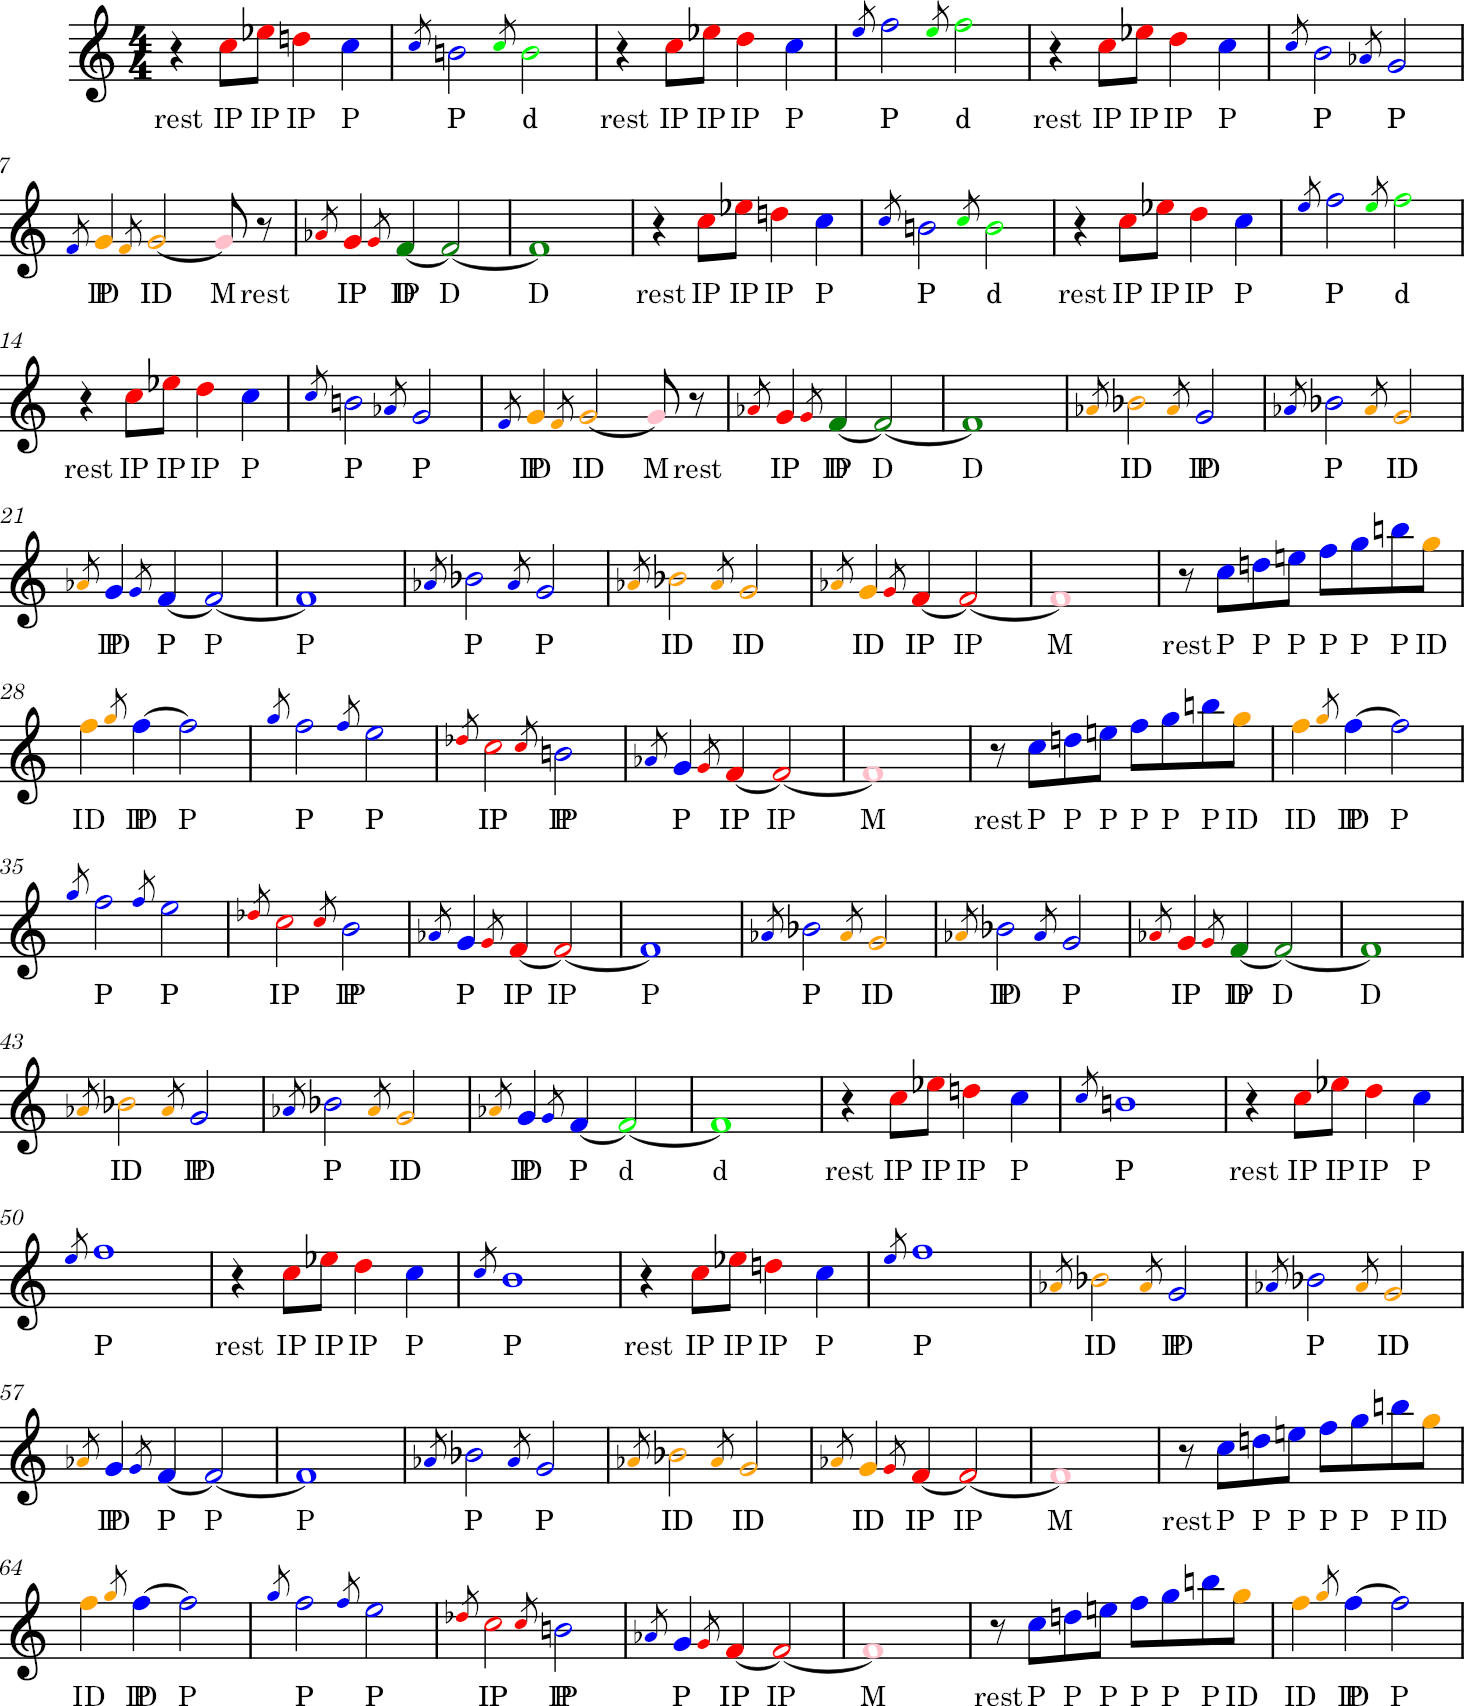

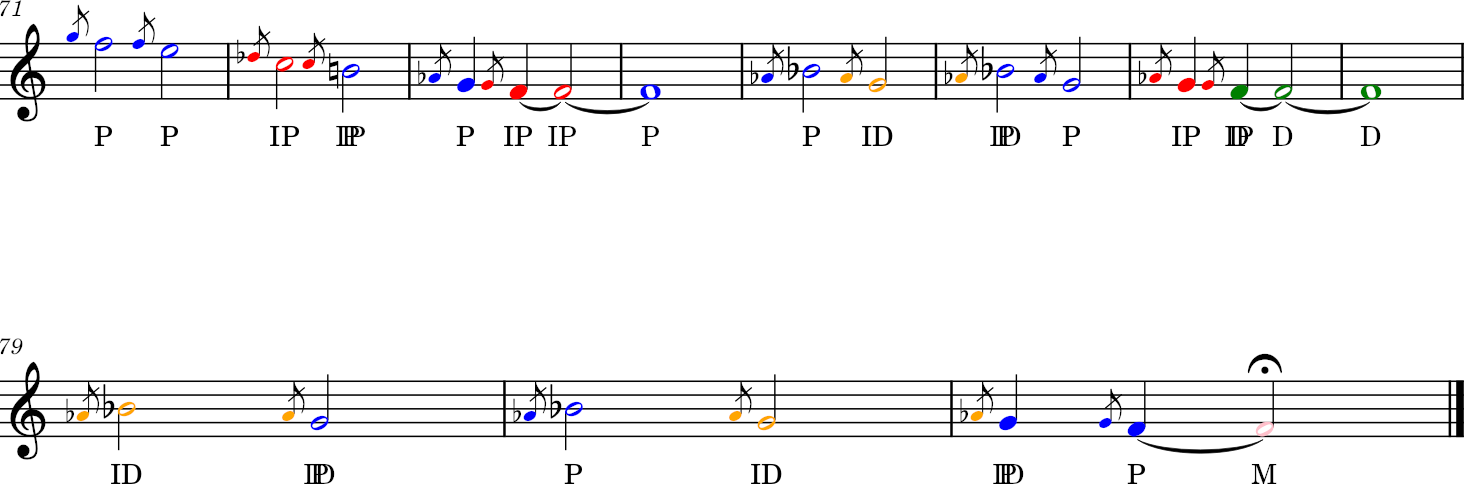

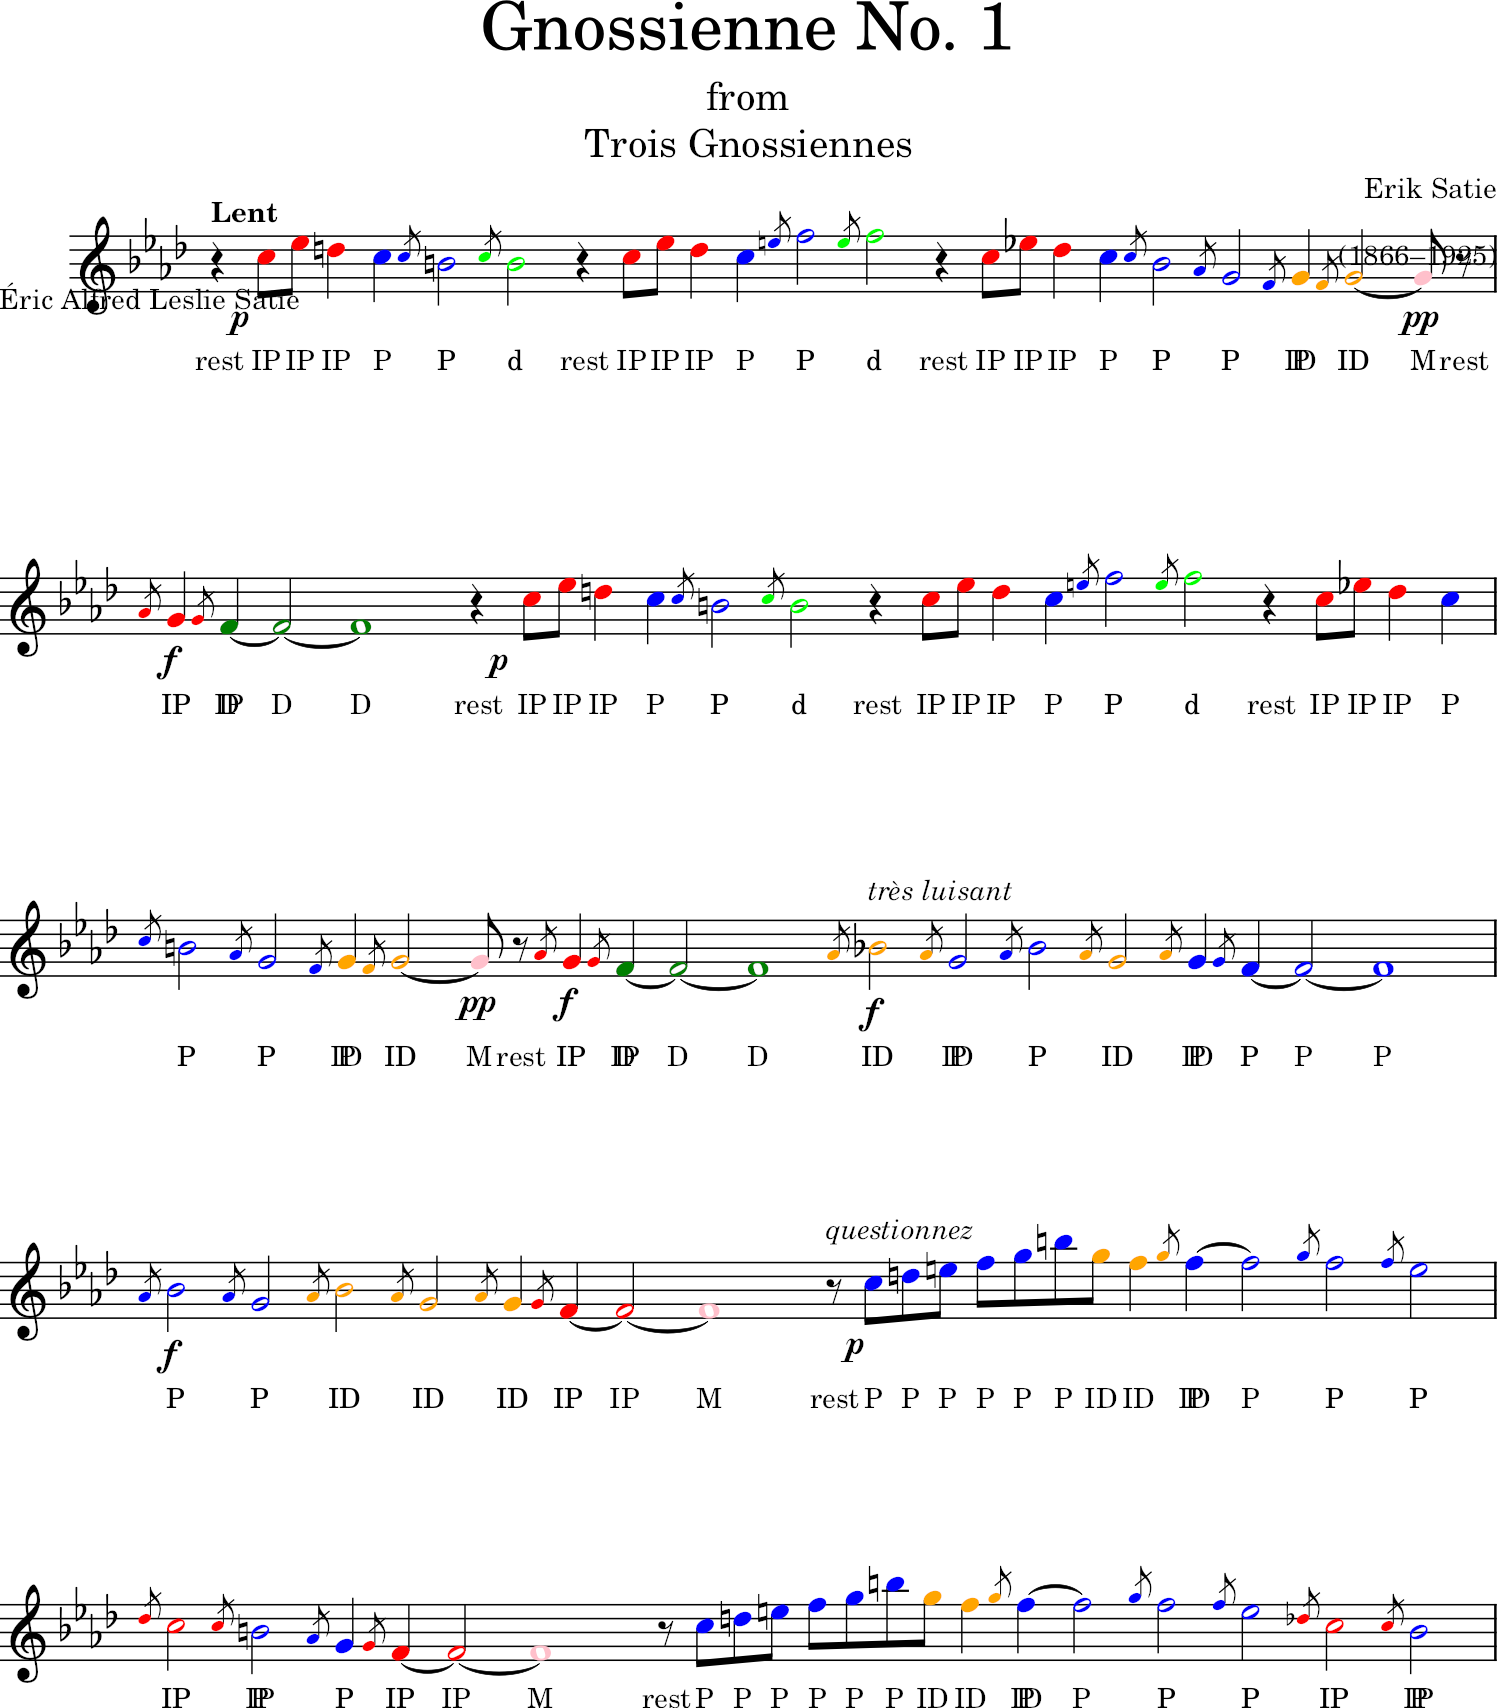

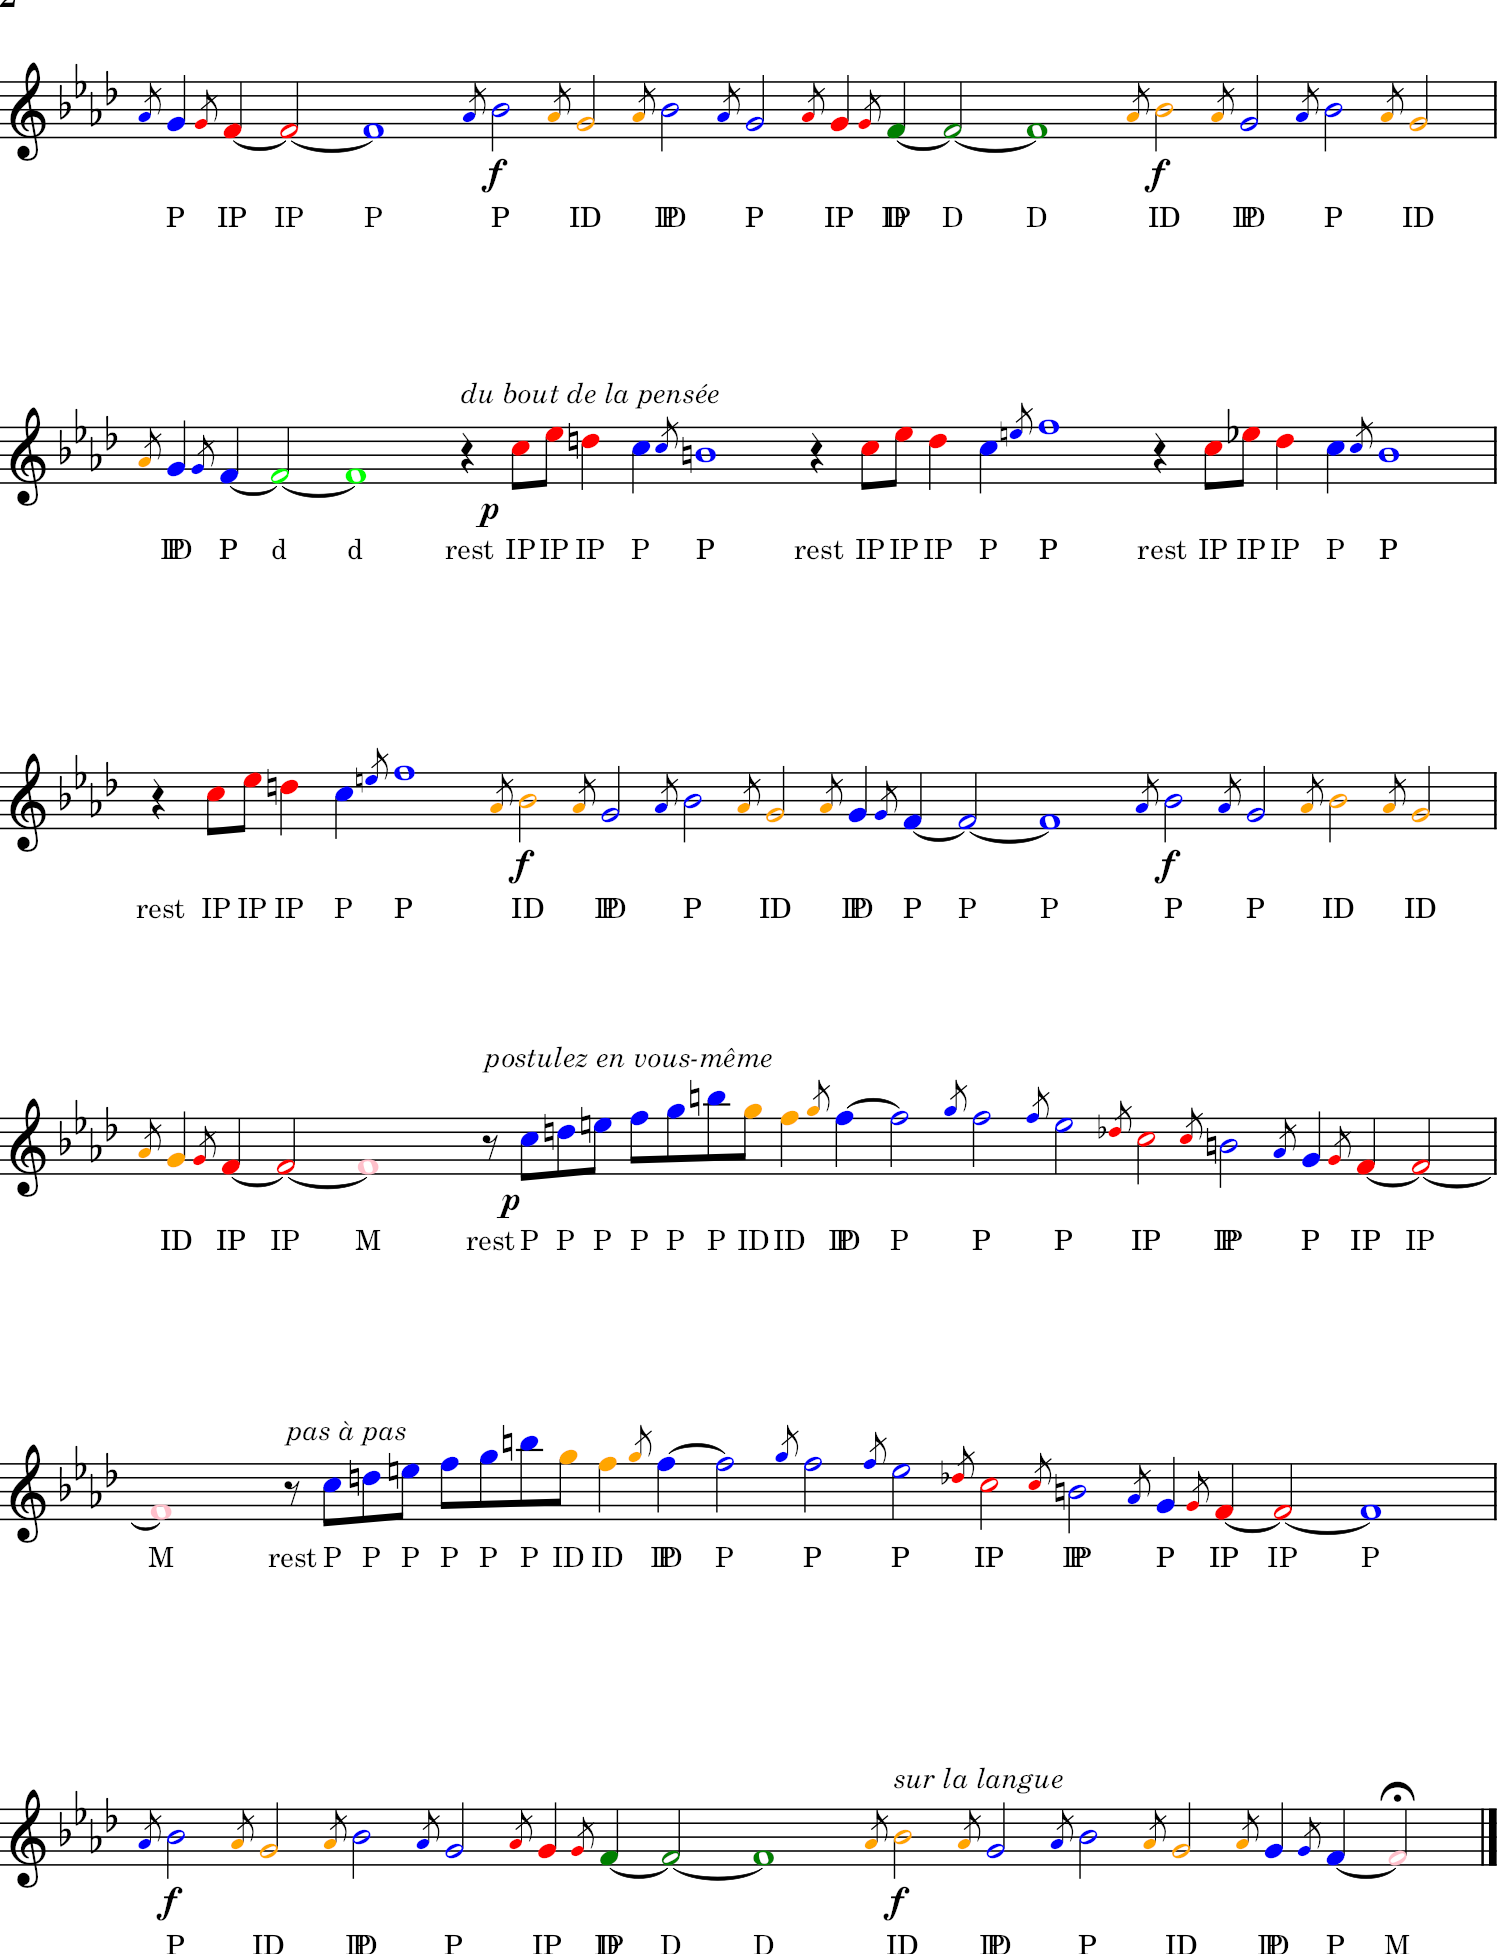

In [78]:
visualize_notes_with_symbols(ir_symbols)
midi_parsed.show()


In [80]:
len(processed_segments)

27

In [81]:
def segments_to_distance_matrix(segments: list[pd.DataFrame], cores=None):
    if __name__ == '__main__':
        
        if cores is not None and cores > cpu_count():
            raise ValueError(f"You don't have enough cores! Please specify a value within your system's number of cores. \n Core Count: {cpu_count()}")
        
        seg_np = [segment.to_numpy() for segment in segments]
    
        num_segments = len(seg_np)
        distance_matrix = np.zeros((num_segments, num_segments))
    
        # Create argument list for multiprocessing
        args_list = []
        for i in range(num_segments):
            for j in range(i + 1, num_segments):
                args_list.append((i, j, segments[i], segments[j]))
    
        with Manager() as manager:
            message_list = manager.list()
    
            def log_message(message):
                message_list.append(message)
    
            # Use multiprocessing Pool to parallelize the calculations
            with Pool() as pool:
                results = pool.map(worker.calculate_distance, args_list)
    
            # Update distance matrix with the results
            for i, j, distance, message in results:
                distance_matrix[i, j] = distance
                distance_matrix[j, i] = distance  # Reflect along the diagonal
                log_message(message)
    
            # Print messages from the shared list
            for message in message_list:
                print(message)
    
        return distance_matrix

In [82]:
distance_matrix = segments_to_distance_matrix(processed_segments)

Calculated Edge Weight (0, 1)
Calculated Edge Weight (0, 2)
Calculated Edge Weight (0, 3)
Calculated Edge Weight (0, 4)
Calculated Edge Weight (0, 5)
Calculated Edge Weight (0, 6)
Calculated Edge Weight (0, 7)
Calculated Edge Weight (0, 8)
Calculated Edge Weight (0, 9)
Calculated Edge Weight (0, 10)
Calculated Edge Weight (0, 11)
Calculated Edge Weight (0, 12)
Calculated Edge Weight (0, 13)
Calculated Edge Weight (0, 14)
Calculated Edge Weight (0, 15)
Calculated Edge Weight (0, 16)
Calculated Edge Weight (0, 17)
Calculated Edge Weight (0, 18)
Calculated Edge Weight (0, 19)
Calculated Edge Weight (0, 20)
Calculated Edge Weight (0, 21)
Calculated Edge Weight (0, 22)
Calculated Edge Weight (0, 23)
Calculated Edge Weight (0, 24)
Calculated Edge Weight (0, 25)
Calculated Edge Weight (0, 26)
Calculated Edge Weight (1, 2)
Calculated Edge Weight (1, 3)
Calculated Edge Weight (1, 4)
Calculated Edge Weight (1, 5)
Calculated Edge Weight (1, 6)
Calculated Edge Weight (1, 7)
Calculated Edge Weight 

In [83]:
distance_matrix

array([[   0.        ,   93.75366659,  113.6012764 ,  144.        ,
         231.55075038,  242.20084641,  303.96299117,  391.36428043,
         420.30881504,  441.89082362,  476.51337862,  513.43110541,
         535.3610931 ,  556.44002372,  609.04720671,  671.59102138,
        1032.35362159,  868.95425656,  973.08478562,  987.25034819,
        1009.85716812, 1046.22894244, 1082.65195238, 1105.32687473,
        1127.50055432, 1181.25124339, 1244.19713068],
       [  93.75366659,    0.        ,   39.77122075,  142.09415892,
         139.42740046,  173.89005147,  237.54525885,  328.63087195,
         349.46494817,  370.63560272,  408.57955162,  440.24283072,
         461.77348343,  482.28699962,  536.50605775,  595.59612994,
         958.14260421,  787.70283102,  913.02478061,  900.80727684,
         922.90560189,  959.27120774,  993.38902249, 1015.52880314,
        1037.03073725, 1091.66237913, 1151.27700837],
       [ 113.6012764 ,   39.77122075,    0.        ,   92.85068659,
        

In [84]:
# distance matrix to knn graph function
def distance_matrix_to_knn_graph(k: int, distance_matrix: np.array, graph_title: str,
                                 seed: int, iterations: int):
  knn_graph = kneighbors_graph(distance_matrix, n_neighbors=k, mode='connectivity')

  G = nx.from_scipy_sparse_array(knn_graph)

  # Detect if the graph is disjoint
  if not nx.is_connected(G):
      print("The KNN graph is disjoint. Ensuring connectivity...")

      # Calculate the connected components
      components = list(nx.connected_components(G))

      # Connect the components
      for i in range(len(components) - 1):
          min_dist = np.inf
          closest_pair = None
          for node1 in components[i]:
              for node2 in components[i + 1]:
                  dist = distance_matrix[node1, node2]
                  if dist < min_dist:
                      min_dist = dist
                      closest_pair = (node1, node2)

          # Add an edge between the closest pair of nodes from different components
          G.add_edge(closest_pair[0], closest_pair[1])

  # Plot the final connected graph
  pos = nx.spring_layout(G, seed=seed, iterations=iterations)
  nx.draw(G, node_size=50, pos=pos)
  plt.title(graph_title + f" (K={k})")
  plt.show()

In [85]:
# distance matrix to knn graph function
def distance_matrices_to_knn_graph(k: int, distance_matrix: np.array, graph_title: str,
                                 seed: int, iterations: int):
  knn_graph = kneighbors_graph(distance_matrix, n_neighbors=k, mode='connectivity')

  G = nx.from_scipy_sparse_array(knn_graph)

  # Detect if the graph is disjoint
  if not nx.is_connected(G):
      print("The KNN graph is disjoint. Ensuring connectivity...")

      # Calculate the connected components
      components = list(nx.connected_components(G))

      # Connect the components
      for i in range(len(components) - 1):
          min_dist = np.inf
          closest_pair = None
          for node1 in components[i]:
              for node2 in components[i + 1]:
                  dist = distance_matrix[node1, node2]
                  if dist < min_dist:
                      min_dist = dist
                      closest_pair = (node1, node2)

          # Add an edge between the closest pair of nodes from different components
          G.add_edge(closest_pair[0], closest_pair[1])

  # Plot the final connected graph
  pos = nx.spring_layout(G, seed=seed, iterations=iterations)
  nx.draw(G, node_size=50, pos=pos)
  plt.title(graph_title + f" (K={k})")
  plt.show()

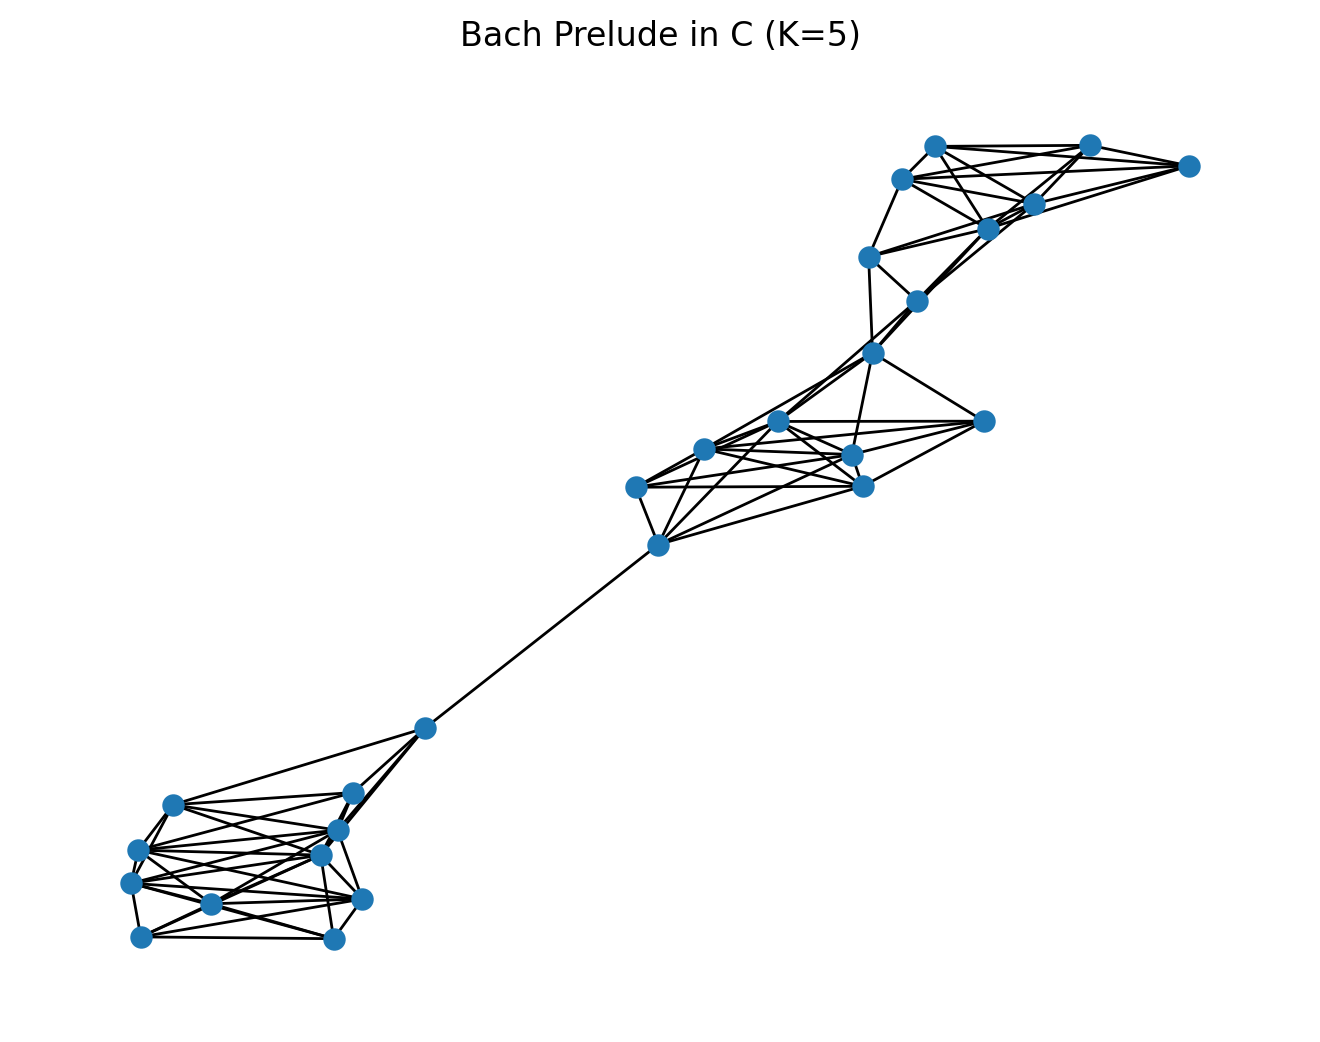

In [87]:
# show graph
distance_matrix_to_knn_graph(5, distance_matrix, "Bach Prelude in C", 69, 700)

In [ ]:
# segments to graph function
def segments_to_graph(k: int, segments: list[pd.DataFrame], labeled_segments, cores=None):
  # Convert segments to a distance matrix
  distance_matrix = segments_to_distance_matrix(segments, cores=cores)

  # Compute the k-NN graph
  knn_graph = kneighbors_graph(distance_matrix, n_neighbors=k, mode='connectivity')

  # Convert the k-NN graph to a NetworkX graph
  G = nx.from_scipy_sparse_array(knn_graph)

  # Add segment data as attributes to each node
  for i in range(len(segments)):
    G.nodes[i]['segment'] = labeled_segments[i] # print shit

  # Detect if the graph is disjoint
  if not nx.is_connected(G):
      print("The KNN graph is disjoint. Ensuring connectivity...")

      # Calculate the connected components
      components = list(nx.connected_components(G))

      # Connect the components
      for i in range(len(components) - 1):
          min_dist = np.inf
          closest_pair = None
          for node1 in components[i]:
              for node2 in components[i + 1]:
                  dist = distance_matrix[node1, node2]
                  if dist < min_dist:
                      min_dist = dist
                      closest_pair = (node1, node2)

          # Add an edge between the closest pair of nodes from different components
          G.add_edge(closest_pair[0], closest_pair[1])

  return G, distance_matrix

In [ ]:
# segments to graph
graph, distance_matrix = segments_to_graph(5, segments, labeled_segments)

# Mass production

In [88]:
import os

In [89]:
# Find all composers with more than 3 songs in the database
def get_directories_with_min_files(root_dir, min_file_count=5):
    qualifying_directories = []
    for dirpath, dirnames, filenames in os.walk(root_dir):
        # Count the number of files in the current directory
        file_count = len([name for name in filenames if os.path.isfile(os.path.join(dirpath, name))])

        # Check if the current directory has at least min_file_count files
        if file_count > min_file_count:
            qualifying_directories.append(os.path.basename(dirpath))

    return qualifying_directories

In [90]:
root_directory = '../Music Database/bach_cello_suites' 
directories = get_directories_with_min_files(root_directory, 0)
directories

['Suite No. 1 in G major',
 'Suite No. 2 in D minor',
 'Suite No. 3 in C major',
 'Suite No. 4 in Eb major',
 'Suite No. 5 in C minor',
 'Suite No. 6 in D major']

In [ ]:
# Original Code Bolck
composer_segments = dict.fromkeys(directories, None)                
labeled_composer_segments = dict.fromkeys(directories, None)

for composer in composer_segments:
    filepath = "../Music Database/bach_cello_suites/" + composer
    labeled_segments = []
    processed_segments = []
    
    piece_count = 0
    for piece in os.listdir(filepath):
        piece_path = os.path.join(filepath, piece)
        parsed_score = converter.parse(piece_path)
        nmat, narr, sarr = parse_score_elements(parsed_score)
        ir_symbols = assign_ir_symbols(narr)
        ir_nmat = ir_symbols_to_matrix(ir_symbols, nmat)
        ir_nmat = assign_ir_pattern_indices(ir_nmat)
        segments = segmentgestalt(ir_nmat)
        processed_segments.extend(preprocess_segments(segments))
        piece_count += 1
        
    labeled_segments.extend([(piece[:-4], segment) for segment in processed_segments]) 
    
    print(f'Composer: {composer} | Piece Count: {piece_count} \n Processed Segments: {len(processed_segments)}')


    composer_segments[composer] = processed_segments
    labeled_composer_segments[composer] = labeled_segments

# Test for Cello Suites

In [ ]:
from copy import deepcopy
from music21 import stream, note

def combine_parts_to_monophonic(score, selection='first'):
    """
    Combines the first two parts of a score into a single monophonic part.
    
    Parameters:
    score: music21.stream.Score
        The input score with at least two parts.
    selection: str
        Criteria to select notes when both parts have notes at the same time.
        Options:
        - 'first': Always choose the note from the first part.
        - 'second': Always choose the note from the second part.
        - 'higher': Choose the note with the higher pitch.
        - 'lower': Choose the note with the lower pitch.
    
    Returns:
    new_score: music21.stream.Score
        The score with the first two parts combined into a monophonic part.
    """
    if len(score.parts) < 2:
        raise ValueError("The score must have at least two parts to combine.")
    
    part1 = score.parts[0]
    part2 = score.parts[1]
    
    combined_part = stream.Part()
    
    # Copy metadata from the first part
    for el in part1.getElementsByClass(['KeySignature', 'TimeSignature', 'TempoIndication', 'Clef']):
        combined_part.insert(el.offset, el)
    
    # Get all unique offsets from both parts
    offsets = sorted(set(
        e.offset for e in list(part1.flat.notesAndRests) + list(part2.flat.notesAndRests)
    ))
    
    for offset in offsets:
        # Get elements at this offset from both parts
        p1_elements = part1.flat.getElementsByOffset(
            offset, mustBeginInSpan=False, mustFinishInSpan=False
        ).notesAndRests
        p2_elements = part2.flat.getElementsByOffset(
            offset, mustBeginInSpan=False, mustFinishInSpan=False
        ).notesAndRests
        
        # Initialize variables
        selected_element = None
        p1_note = next((n for n in p1_elements if isinstance(n, note.Note)), None)
        p2_note = next((n for n in p2_elements if isinstance(n, note.Note)), None)
        p1_rest = next((r for r in p1_elements if isinstance(r, note.Rest)), None)
        p2_rest = next((r for r in p2_elements if isinstance(r, note.Rest)), None)
        
        # Decide which element to include
        if p1_note and p2_note:
            # Both parts have notes at this offset
            if selection == 'first':
                selected_element = p1_note
            elif selection == 'second':
                selected_element = p2_note
            elif selection == 'higher':
                selected_element = p1_note if p1_note.pitch > p2_note.pitch else p2_note
            elif selection == 'lower':
                selected_element = p1_note if p1_note.pitch < p2_note.pitch else p2_note
            else:
                selected_element = p1_note  # Default to first part
        elif p1_note:
            selected_element = p1_note
        elif p2_note:
            selected_element = p2_note
        elif p1_rest and p2_rest:
            # Both parts have rests
            selected_element = p1_rest if p1_rest.quarterLength >= p2_rest.quarterLength else p2_rest
        elif p1_rest:
            selected_element = p1_rest
        elif p2_rest:
            selected_element = p2_rest
        else:
            # No element found; this shouldn't happen
            continue
        
        # Insert the selected element into the combined part
        combined_part.insert(offset, deepcopy(selected_element))
    
    # Remove the first two parts from the score
    score.remove(part1)
    score.remove(part2)
    
    # Insert the combined part into the score at the position of the first part
    score.insert(0, combined_part)
    
    return score


In [102]:
directories

['Suite No. 1 in G major',
 'Suite No. 2 in D minor',
 'Suite No. 3 in C major',
 'Suite No. 4 in Eb major',
 'Suite No. 5 in C minor',
 'Suite No. 6 in D major']

In [104]:
# Original Code Bolck
composer_segments = dict.fromkeys(directories, None)                # Composer matrix that is the average of piece matrices
labeled_composer_segments = dict.fromkeys(directories, None)

for composer in composer_segments:
    filepath = "../Music Database/bach_cello_suites/" + composer
    labeled_segments = []
    processed_segments = []
    
    piece_count = 0
    for piece in os.listdir(filepath):
        piece_path = os.path.join(filepath, piece)
        parsed_score = converter.parse(piece_path)
        first_part = parsed_score.parts[0]
        new_score = stream.Score()
        new_score.append(first_part)
        nmat, narr, sarr = parse_score_elements(new_score)
        ir_symbols = assign_ir_symbols(narr)
        ir_nmat = ir_symbols_to_matrix(ir_symbols, nmat)
        ir_nmat = assign_ir_pattern_indices(ir_nmat)
        segments = segmentgestalt(ir_nmat)
        processed_segments.extend(preprocess_segments(segments))
        piece_count += 1
        
    labeled_segments.extend([(piece[:-4], segment) for segment in processed_segments]) 
    
    print(f'Composer: {composer} | Piece Count: {piece_count} \n Processed Segments: {len(processed_segments)}')


    composer_segments[composer] = processed_segments
    labeled_composer_segments[composer] = labeled_segments

Composer: Suite No. 1 in G major | Piece Count: 6 
 Processed Segments: 214
Composer: Suite No. 2 in D minor | Piece Count: 6 
 Processed Segments: 242
Composer: Suite No. 3 in C major | Piece Count: 6 
 Processed Segments: 316
Composer: Suite No. 4 in Eb major | Piece Count: 6 
 Processed Segments: 349
Composer: Suite No. 5 in C minor | Piece Count: 6 
 Processed Segments: 285
Composer: Suite No. 6 in D major | Piece Count: 6 
 Processed Segments: 368


In [122]:
len(processed_segments)

368

In [120]:
bach_cello_segments = composer_segments

In [121]:
# Save the dictionary to a file
with open('bach_cello_segments.pkl', 'wb') as f:
    pickle.dump(bach_cello_segments, f)

# Test for Ysaye

In [130]:
directories = os.listdir("../Music Database/Ysaye_Six_Sonatas")
directories

['Solo_Violin_Sonata_in_A_Minor_-_E._Ysae_Op._27_No._2.mxl',
 'Solo_Violin_Sonata_in_D_Minor_-_E._Ysae_Op._27_No._3.mxl',
 'Solo_Violin_Sonata_in_E_Major_-_E._Ysae_Op._27_No._6.mxl',
 'Solo_Violin_Sonata_in_E_Minor_-_E._Ysae_Op._27_No._4.mxl',
 'Solo_Violin_Sonata_in_G_Major_-_E._Ysae_Op._27_No._5.mxl',
 'Solo_Violin_Sonata_in_G_Minor_-_E._Ysae_Op._27_No._1.mxl']

In [131]:
composer_segments = dict.fromkeys(directories, None)                # Composer matrix that is the average of piece matrices
labeled_composer_segments = dict.fromkeys(directories, None)

filepath = "../Music Database/Ysaye_Six_Sonatas"

piece_count = 0
for piece in os.listdir(filepath):    
    piece_path = os.path.join(filepath, piece)
    parsed_score = converter.parse(piece_path)
    nmat, narr, sarr = parse_score_elements(parsed_score)
    ir_symbols = assign_ir_symbols(narr)
    ir_nmat = ir_symbols_to_matrix(ir_symbols, nmat)
    ir_nmat = assign_ir_pattern_indices(ir_nmat)
    segments = segmentgestalt(ir_nmat)
    prepped_segments = preprocess_segments(segments)
    
    piece_count += 1
    

    print(f'Composer: {piece} | Piece Count: {piece_count} \n Processed Segments: {len(prepped_segments)}')


    composer_segments[piece] = prepped_segments
    labeled_composer_segments[piece] = labeled_segments

Composer: Solo_Violin_Sonata_in_A_Minor_-_E._Ysae_Op._27_No._2.mxl | Piece Count: 1 
 Processed Segments: 238
Composer: Solo_Violin_Sonata_in_D_Minor_-_E._Ysae_Op._27_No._3.mxl | Piece Count: 2 
 Processed Segments: 160
Composer: Solo_Violin_Sonata_in_E_Major_-_E._Ysae_Op._27_No._6.mxl | Piece Count: 3 
 Processed Segments: 137
Composer: Solo_Violin_Sonata_in_E_Minor_-_E._Ysae_Op._27_No._4.mxl | Piece Count: 4 
 Processed Segments: 234
Composer: Solo_Violin_Sonata_in_G_Major_-_E._Ysae_Op._27_No._5.mxl | Piece Count: 5 
 Processed Segments: 195
Composer: Solo_Violin_Sonata_in_G_Minor_-_E._Ysae_Op._27_No._1.mxl | Piece Count: 6 
 Processed Segments: 293


In [132]:
ysaye_sonata_segments = composer_segments

# Save the dictionary to a file
with open('ysaye_sonata_segments.pkl', 'wb') as f:
    pickle.dump(ysaye_sonata_segments, f)

# For random

In [133]:
directories = os.listdir("../Music Database/Good_maybe")
directories

['Bach_-_Minuet_in_G_Major_Bach.mxl',
 'Beethoven_-_Piano_Sonata_No._20_in_G_Major_Op._49_1st_Movement.mxl',
 'Chopin_-_Ballade_No.1_in_G_minor_Op._23_violin.mxl',
 'Chopin_-_Etude_Op.10_No.1_Waterfall_Chopin_in_C_Major.mxl',
 'Chopin_-_Etude_Op.25_No.11_in_A_minor_Winter_Wind_-_F._Chopin.mxl',
 'Chopin_-_Nocturne_Op_9_No_2_E_Flat_Major.mxl',
 'Chopin_-_Waltz_Opus_64_No._1_in_D_Major_Minute_Waltz.mxl',
 'Chopin_-_Waltz_Opus_64_No._2_in_C_Minor.mxl',
 'Chopin_-_Waltz_Opus_69_No._1_in_A_Major.mxl',
 'Mozart_-_Menuett_in_G_Major.mxl',
 'Mozart_-_Piano_Sonata_No._11_K._331_3rd_Movement_Rondo_alla_Turca.mxl',
 'Mozart_-_Sonata_No._10_1st_Movement_K._330.mxl',
 'Satie_-_Gnossienne_No._1.mxl']

In [134]:
composer_segments = dict.fromkeys(directories, None)                # Composer matrix that is the average of piece matrices
labeled_composer_segments = dict.fromkeys(directories, None)

filepath = "../Music Database/Good_maybe"

piece_count = 0
for piece in os.listdir(filepath):    
    piece_path = os.path.join(filepath, piece)
    parsed_score = converter.parse(piece_path)
    nmat, narr, sarr = parse_score_elements(parsed_score)
    ir_symbols = assign_ir_symbols(narr)
    ir_nmat = ir_symbols_to_matrix(ir_symbols, nmat)
    ir_nmat = assign_ir_pattern_indices(ir_nmat)
    segments = segmentgestalt(ir_nmat)
    prepped_segments = preprocess_segments(segments)
    
    piece_count += 1
    

    print(f'Composer: {piece} | Piece Count: {piece_count} \n Processed Segments: {len(prepped_segments)}')


    composer_segments[piece] = prepped_segments
    labeled_composer_segments[piece] = labeled_segments

Composer: Bach_-_Minuet_in_G_Major_Bach.mxl | Piece Count: 1 
 Processed Segments: 9
Composer: Beethoven_-_Piano_Sonata_No._20_in_G_Major_Op._49_1st_Movement.mxl | Piece Count: 2 
 Processed Segments: 72
Composer: Chopin_-_Ballade_No.1_in_G_minor_Op._23_violin.mxl | Piece Count: 3 
 Processed Segments: 124
Composer: Chopin_-_Etude_Op.10_No.1_Waterfall_Chopin_in_C_Major.mxl | Piece Count: 4 
 Processed Segments: 154
Composer: Chopin_-_Etude_Op.25_No.11_in_A_minor_Winter_Wind_-_F._Chopin.mxl | Piece Count: 5 
 Processed Segments: 197
Composer: Chopin_-_Nocturne_Op_9_No_2_E_Flat_Major.mxl | Piece Count: 6 
 Processed Segments: 26
Composer: Chopin_-_Waltz_Opus_64_No._1_in_D_Major_Minute_Waltz.mxl | Piece Count: 7 
 Processed Segments: 45
Composer: Chopin_-_Waltz_Opus_64_No._2_in_C_Minor.mxl | Piece Count: 8 
 Processed Segments: 63
Composer: Chopin_-_Waltz_Opus_69_No._1_in_A_Major.mxl | Piece Count: 9 
 Processed Segments: 52
Composer: Mozart_-_Menuett_in_G_Major.mxl | Piece Count: 10 
 Pr

In [135]:
random_segments = composer_segments

# Save the dictionary to a file
with open('random_segments.pkl', 'wb') as f:
    pickle.dump(random_segments, f)

In [8]:
with open('random_segments.pkl', 'rb') as file:
    random_segments = pickle.load(file)
with open('bach_cello_segments.pkl', 'rb') as file:
    bach_cello_segments = pickle.load(file)
with open('ysaye_sonata_segments.pkl', 'rb') as file:
    ysaye_sonata_segments = pickle.load(file)

In [13]:
ysaye_sonata_segments.keys()

dict_keys(['Solo_Violin_Sonata_in_A_Minor_-_E._Ysae_Op._27_No._2.mxl', 'Solo_Violin_Sonata_in_D_Minor_-_E._Ysae_Op._27_No._3.mxl', 'Solo_Violin_Sonata_in_E_Major_-_E._Ysae_Op._27_No._6.mxl', 'Solo_Violin_Sonata_in_E_Minor_-_E._Ysae_Op._27_No._4.mxl', 'Solo_Violin_Sonata_in_G_Major_-_E._Ysae_Op._27_No._5.mxl', 'Solo_Violin_Sonata_in_G_Minor_-_E._Ysae_Op._27_No._1.mxl'])

In [14]:
len(ysaye_sonata_segments.keys())

6

In [ ]:
composer_dist_mats = {}

for composer, segments in bach_cello_segments.items():
    print(f'composer: {composer} | Segments: {len(segments)}')
    composer_dist_mats[composer] = segments_to_distance_matrix(segments)

    with open(f'{composer}_distance_matrix.pkl', 'wb') as f:
        pickle.dump(composer_dist_mats[composer], f)

composer: Suite No. 1 in G major | Segments: 214


In [ ]:
for composer, segments in ysaye_sonata_segments.items():
    print(f'composer: {composer} | Segments: {len(segments)}')
    composer_dist_mats[composer] = segments_to_distance_matrix(segments)

    with open(f'{composer}_distance_matrix.pkl', 'wb') as f:
        pickle.dump(composer_dist_mats[composer], f)

In [ ]:
for composer, segments in random_segments.items():
    print(f'composer: {composer} | Segments: {len(segments)}')
    composer_dist_mats[composer] = segments_to_distance_matrix(segments)

    with open(f'{composer}_distance_matrix.pkl', 'wb') as f:
        pickle.dump(composer_dist_mats[composer], f)

In [ ]:
from itertools import combinations
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
from multiprocessing import cpu_count

def segments_to_distance_matrix2(segments: list[pd.DataFrame], cores=None):
    """
    Converts segments to a distance matrix using efficient parallel computation.

    Parameters:
    segments (list[pd.DataFrame]): A list of segmented DataFrames.
    cores (int): The number of CPU cores to use for parallel computation (default is None).

    Returns:
    np.ndarray: A distance matrix representing distances between segments.
    """
    if cores is not None and cores > cpu_count():
        raise ValueError(
            f"You don't have enough cores! Please specify a value within your system's number of cores. "
            f"Core Count: {cpu_count()}"
        )

    # Convert DataFrames to numpy arrays once to minimize overhead
    seg_np = [segment.to_numpy() for segment in segments]
    num_segments = len(seg_np)
    distance_matrix = np.zeros((num_segments, num_segments))

    # Define the function to compute distance between two segments
    def compute_distance(i, j):
        # Access the pre-converted numpy arrays directly
        distance, message = worker.calculate_distance(seg_np[i], seg_np[j])
        return i, j, distance, message

    # Use joblib's Parallel and delayed for efficient multiprocessing
    results = Parallel(n_jobs=cores)(
        delayed(compute_distance)(i, j) for i, j in combinations(range(num_segments), 2)
    )

    # Populate the distance matrix and handle messages
    for i, j, distance, message in results:
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance  # Reflect along the diagonal
        print(message)

    return distance_matrix


In [ ]:
composer_dist_mats = dict.fromkeys(directories, None)

for composer, segments in composer_segments.items():
    composer_dist_mats[composer] = segments_to_distance_matrix2(segments)

print(len(composer_dist_mats[composer]))
print(composer_dist_mats[composer])

In [ ]:
def composers_segments_to_graphs(k: int, composers_segments: dict, seed: int, iterations: int, cores=None):
    """
    Creates KNN graphs from segments and plots them in a grid layout.

    Parameters:
    k (int): Number of nearest neighbors for the KNN graph.
    composers_segments (dict): Dictionary where keys are composer names and values are their segments.
    seed (int): Random seed for the spring layout.
    iterations (int): Number of iterations for the spring layout.
    cores (int, optional): Number of CPU cores to use for parallel processing.
    """
    num_graphs = len(composers_segments)
    rows_needed = (num_graphs + 1) // 2  # Calculate rows needed for two columns
    fig, axes = plt.subplots(rows_needed, 2, figsize=(12, rows_needed * 5))  # 2 columns, rows as needed

    if num_graphs == 1:
        axes = np.array([[axes]])  # Ensure axes is 2D array for single graph
    elif num_graphs == 2:
        axes = axes.reshape(-1, 2)  # Reshape to ensure 2 columns when exactly two graphs

    axes = axes.flatten()  # Flatten the axes array to iterate easily
    for ax, (composer, segments) in zip(axes, composers_segments.items()):
        # labeled_segments = [f"Segment {i}" for i in range(len(segments))]
        G, distance_matrix = segments_to_graph(k, segments, labeled_segments, cores=cores)

        # Plot the final connected graph
        pos = nx.spring_layout(G, seed=seed, iterations=iterations)
        nx.draw(G, node_size=50, pos=pos, ax=ax)
        ax.set_title(f"{composer} (K={k})")
        ax.axis('off')

    # Hide any unused axes if there are fewer graphs than subplots
    for ax in axes[num_graphs:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
composer_graphs = dict.fromkeys(directories, None)

def distance_matrices_to_knn_graphs(k: int, distance_matrices: dict, seed: int, iterations: int):
    """
    Creates KNN graphs from distance matrices and plots them in a grid layout.

    Parameters:
    k (int): Number of nearest neighbors for the KNN graph.
    distance_matrices (dict): Dictionary where keys are composer names and values are distance matrices.
    seed (int): Random seed for the spring layout.
    iterations (int): Number of iterations for the spring layout.
    """
    num_graphs = len(distance_matrices)
    rows_needed = (num_graphs + 1) // 2  # Calculate rows needed for two columns
    fig, axes = plt.subplots(rows_needed, 2, figsize=(12, rows_needed * 5))  # 2 columns, rows as needed

    if num_graphs == 1:
        axes = np.array([[axes]])  # Ensure axes is 2D array for single graph
    elif num_graphs == 2:
        axes = axes.reshape(-1, 2)  # Reshape to ensure 2 columns when exactly two graphs

    axes = axes.flatten()  # Flatten the axes array to iterate easily
    for ax, (composer, distance_matrix) in zip(axes, distance_matrices.items()):
        knn_graph = kneighbors_graph(distance_matrix, n_neighbors=k, mode='connectivity')
        G = nx.from_scipy_sparse_array(knn_graph)

        # Detect if the graph is disjoint
        # if not nx.is_connected(G):
        #     print(f"The KNN graph for {composer} is disjoint. Ensuring connectivity...")
        # 
        #     # Calculate the connected components
        #     components = list(nx.connected_components(G))
        # 
        #     # Connect the components
        #     for i in range(len(components) - 1):
        #         min_dist = np.inf
        #         closest_pair = None
        #         for node1 in components[i]:
        #             for node2 in components[i + 1]:
        #                 dist = distance_matrix[node1, node2]
        #                 if dist < min_dist:
        #                     min_dist = dist
        #                     closest_pair = (node1, node2)
        # 
        #         # Add an edge between the closest pair of nodes from different components
        #         G.add_edge(closest_pair[0], closest_pair[1])
            
        composer_graphs[composer] = G

        # Plot the final connected graph
        pos = nx.spring_layout(G, seed=seed, iterations=iterations)
        nx.draw(G, node_size=50, pos=pos, ax=ax)
        ax.set_title(f"{composer} (K={k})")
        ax.axis('off')

        output_dir = "..Output"
        fig_individual, ax_individual = plt.subplots(figsize=(6, 5))
        nx.draw(G, node_size=50, pos=pos, ax=ax_individual)
        ax_individual.set_title(f"{composer} (K={k})")
        ax_individual.axis('off')
        fig_individual.savefig(f"{composer}_KNN_graph.png")
        plt.close(fig_individual)
        
    # Hide any unused axes if there are fewer graphs than subplots
    for ax in axes[num_graphs:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
distance_matrices_to_knn_graphs(5, composer_dist_mats, seed=69, iterations=650)

In [ ]:
distance_matrices_to_knn_graphs(5, composer_dist_mats, seed=69, iterations=650)

In [ ]:
import plotly.graph_objects as go
import networkx as nx
from sklearn.neighbors import kneighbors_graph
import numpy as np

composer_graphs = dict.fromkeys(directories, None)

def distance_matrices_to_knn_graphs_plotly(k: int, distance_matrices: dict, seed: int, iterations: int):
    """
    Creates interactive KNN graphs from distance matrices and displays them using Plotly.

    Parameters:
    k (int): Number of nearest neighbors for the KNN graph.
    distance_matrices (dict): Dictionary where keys are composer names and values are distance matrices.
    seed (int): Random seed for the spring layout.
    iterations (int): Number of iterations for the spring layout.
    """
    num_graphs = len(distance_matrices)
    fig = go.Figure()

    for composer, distance_matrix in distance_matrices.items():
        knn_graph = kneighbors_graph(distance_matrix, n_neighbors=k, mode='distance')
        G = nx.from_scipy_sparse_array(knn_graph)

        # Save the graph to composer_graphs
        composer_graphs[composer] = G

        # Spring layout for node positioning
        pos = nx.spring_layout(G, seed=seed, iterations=iterations)

        # Extract edge positions for plotly
        edge_x = []
        edge_y = []
        for edge in G.edges():
            x0, y0 = pos[edge[0]]
            x1, y1 = pos[edge[1]]
            edge_x.append(x0)
            edge_x.append(x1)
            edge_x.append(None)  # Separate the lines between edges
            edge_y.append(y0)
            edge_y.append(y1)
            edge_y.append(None)

        # Create trace for edges
        edge_trace = go.Scatter(
            x=edge_x, y=edge_y,
            line=dict(width=1, color='#888'),
            hoverinfo='none',
            mode='lines',
            showlegend=False
        )

        # Extract node positions and details for plotly
        node_x = []
        node_y = []
        for node in G.nodes():
            x, y = pos[node]
            node_x.append(x)
            node_y.append(y)

        # Create trace for nodes
        node_trace = go.Scatter(
            x=node_x, y=node_y,
            mode='markers',
            hoverinfo='text',
            marker=dict(
                showscale=True,
                colorscale='YlGnBu',
                size=10,
                colorbar=dict(
                    thickness=15,
                    title='Node Degree',
                    xanchor='left',
                    titleside='right'
                ),
                line_width=2
            ),
            text=[f'Node {n}' for n in G.nodes()],
            showlegend=False
        )

        # Add both the edge and node traces for the current composer
        fig.add_trace(edge_trace)
        fig.add_trace(node_trace)

        # Add a title to the figure for each composer
        fig.update_layout(
            title=f"KNN Graph for {composer} (K={k})",
            titlefont_size=16,
            showlegend=False,
            hovermode='closest',
            margin=dict(b=0, l=0, r=0, t=40),
            annotations=[dict(
                text=f"{composer} KNN Graph",
                showarrow=False,
                xref="paper", yref="paper",
                x=0.5, y=-0.1,
                xanchor="center", yanchor="top"
            )],
            xaxis=dict(showgrid=False, zeroline=False),
            yaxis=dict(showgrid=False, zeroline=False)
        )

    # Display the figure
    fig.show()


In [ ]:
distance_matrices_to_knn_graphs_plotly(5, composer_dist_mats, seed=69, iterations=650)


# Test Graphs

In [ ]:
distance_matrices = composer_dist_mats

In [ ]:
import numpy as np
import networkx as nx
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt

def create_knn_graphs(distance_matrices, k=5, seed=42, iterations=50):
    """
    Creates KNN graphs from distance matrices and plots them.

    Parameters:
    - distance_matrices (dict): Dictionary where keys are composer names and values are distance matrices.
    - k (int): Number of nearest neighbors.
    - seed (int): Random seed for layout.
    - iterations (int): Number of iterations for the layout algorithm.
    """
    for composer, distance_matrix in distance_matrices.items():
        # Create KNN graph
        knn_graph = kneighbors_graph(distance_matrix, n_neighbors=k, mode='distance', include_self=False)
        G = nx.from_scipy_sparse_array(knn_graph)

        # Layout and plot
        pos = nx.spring_layout(G, seed=seed, iterations=iterations)
        plt.figure(figsize=(8, 6))
        nx.draw(G, pos, node_size=50, with_labels=False)
        plt.title(f"KNN Graph for {composer} (k={k})")
        plt.axis('off')
        plt.show()

create_knn_graphs(distance_matrices, k=5)

In [ ]:
from scipy.sparse.csgraph import minimum_spanning_tree

def create_mst_graphs(distance_matrices):
    """
    Creates Minimum Spanning Trees from distance matrices and plots them.

    Parameters:
    - distance_matrices (dict): Dictionary where keys are composer names and values are distance matrices.
    """
    for composer, distance_matrix in distance_matrices.items():
        # Compute MST
        mst = minimum_spanning_tree(distance_matrix)
        G = nx.from_scipy_sparse_array(mst)

        # Layout and plot
        pos = nx.spring_layout(G, seed=42)
        plt.figure(figsize=(8, 6))
        nx.draw(G, pos, node_size=50, with_labels=False)
        plt.title(f"MST for {composer}")
        plt.axis('off')
        plt.show()
        
create_mst_graphs(distance_matrices)

In [ ]:
def create_thresholded_graphs(distance_matrices, threshold):
    """
    Creates thresholded graphs from distance matrices and plots them.

    Parameters:
    - distance_matrices (dict): Dictionary where keys are composer names and values are distance matrices.
    - threshold (float): Distance threshold for creating edges.
    """
    for composer, distance_matrix in distance_matrices.items():
        # Create adjacency matrix based on threshold
        adjacency_matrix = (distance_matrix <= threshold).astype(int)
        np.fill_diagonal(adjacency_matrix, 0)
        G = nx.from_numpy_array(adjacency_matrix)

        # Layout and plot
        pos = nx.spring_layout(G, seed=42)
        plt.figure(figsize=(8, 6))
        nx.draw(G, pos, node_size=50, with_labels=False)
        plt.title(f"Thresholded Graph for {composer} (threshold={threshold})")
        plt.axis('off')
        plt.show()
create_thresholded_graphs(distance_matrices, threshold=1.0)


In [ ]:
from sklearn.cluster import SpectralClustering

def create_spectral_clustering_graphs(distance_matrices, n_clusters):
    """
    Performs spectral clustering on distance matrices and plots the results.

    Parameters:
    - distance_matrices (dict): Dictionary where keys are composer names and values are distance matrices.
    - n_clusters (int): Number of clusters.
    """
    for composer, distance_matrix in distance_matrices.items():
        # Perform spectral clustering
        clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
        labels = clustering.fit_predict(distance_matrix)

        # Create a graph for visualization
        G = nx.from_numpy_array(distance_matrix)
        pos = nx.spring_layout(G, seed=42)
        plt.figure(figsize=(8, 6))
        nx.draw(G, pos, node_color=labels, cmap=plt.cm.Set1, node_size=50, with_labels=False)
        plt.title(f"Spectral Clustering for {composer} (n_clusters={n_clusters})")
        plt.axis('off')
        plt.show()
create_spectral_clustering_graphs(distance_matrices, n_clusters=10)


In [ ]:
from sklearn.manifold import MDS

def create_mds_plots(distance_matrices, n_components=2):
    """
    Performs MDS on distance matrices and plots the results.

    Parameters:
    - distance_matrices (dict): Dictionary where keys are composer names and values are distance matrices.
    - n_components (int): Number of dimensions for MDS.
    """
    for composer, distance_matrix in distance_matrices.items():
        mds = MDS(n_components=n_components, dissimilarity='precomputed', random_state=42)
        mds_fit = mds.fit_transform(distance_matrix)

        plt.figure(figsize=(8, 6))
        plt.scatter(mds_fit[:, 0], mds_fit[:, 1], s=50)
        plt.title(f"MDS Plot for {composer}")
        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
        plt.show()
create_mds_plots(distance_matrices)


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

def create_dendrograms(distance_matrices, method='ward'):
    """
    Creates dendrograms from distance matrices.

    Parameters:
    - distance_matrices (dict): Dictionary where keys are composer names and values are distance matrices.
    - method (str): Linkage method ('single', 'complete', 'average', 'ward', etc.)
    """
    for composer, distance_matrix in distance_matrices.items():
        # Convert the distance matrix to a condensed distance matrix
        condensed_distance = distance_matrix[np.triu_indices_from(distance_matrix, k=1)]
        # Perform hierarchical clustering
        linked = linkage(condensed_distance, method=method)

        plt.figure(figsize=(10, 7))
        dendrogram(linked)
        plt.title(f"Dendrogram for {composer} (method={method})")
        plt.xlabel("Sample Index")
        plt.ylabel("Distance")
        plt.show()
create_dendrograms(distance_matrices)


In [ ]:
def create_force_directed_graphs(distance_matrices):
    """
    Creates force-directed graphs from distance matrices.

    Parameters:
    - distance_matrices (dict): Dictionary where keys are composer names and values are distance matrices.
    """
    for composer, distance_matrix in distance_matrices.items():
        # Create a fully connected graph with distances as edge weights
        G = nx.from_numpy_array(distance_matrix)

        # Use spring layout with edge weights influencing node positions
        pos = nx.spring_layout(G, seed=42, weight='weight')

        # Plot the graph
        plt.figure(figsize=(8, 6))
        nx.draw(G, pos, node_size=50, with_labels=False, edge_color='gray', alpha=0.7)
        plt.title(f"Force-Directed Graph for {composer}")
        plt.axis('off')
        plt.show()
create_force_directed_graphs(distance_matrices)


In [ ]:
# Original Code Bolck
composer_segments = dict.fromkeys(['Brandenburg Concerto No. 2 in F Major, BWV 1047 by Johann Sebastian Bach'], None)                # Composer matrix that is the average of piece matrices
labeled_composer_segments = dict.fromkeys(['Brandenburg Concerto No. 2 in F Major, BWV 1047 by Johann Sebastian Bach'], None)

for composer in composer_segments:
    filepath = "../Bach, Johann Sebastian, 1685-1750/" + composer
    labeled_segments = []
    processed_segments = []
    
    piece_count = 0
    for piece in os.listdir(filepath):
        piece_path = os.path.join(filepath, piece)
        parsed_score = converter.parse(piece_path)
        nmat, narr, sarr = parse_score_elements(parsed_score)
        ir_symbols = assign_ir_symbols(narr)
        ir_nmat = ir_symbols_to_matrix(ir_symbols, nmat)
        ir_nmat = assign_ir_pattern_indices(ir_nmat)
        segments = segmentgestalt(ir_nmat)
        processed_segments.extend(preprocess_segments(segments))
        piece_count += 1
        
    labeled_segments.extend([(piece[:-4], segment) for segment in processed_segments]) # turned into one line instead of a function
    
    print(f'Composer: {composer} | Piece Count: {piece_count} \n Processed Segments: {len(processed_segments)}')


    composer_segments[composer] = processed_segments
    labeled_composer_segments[composer] = labeled_segments

In [ ]:
def graph_metrics(graph: nx.classes.graph.Graph, distance_matrix: np.array, seed: int) -> pd.DataFrame:
    """
    Calculates various graph metrics and returns them in a DataFrame.

    Parameters:
    graph (nx.classes.graph.Graph): The graph to analyze.
    distance_matrix (np.array): The distance matrix.
    seed (int): Random seed for community detection.

    Returns:
    pd.DataFrame: DataFrame containing the average metrics.
    """
    avg_dtw_distance = distance_matrix.mean()
    avg_clustering_coef = nx.average_clustering(graph)

    communities = nx.community.louvain_communities(graph, seed=seed)

    silhouette_scores = []
    for cluster in communities:
        for i in cluster:
            cluster_distances = distance_matrix[i, list(cluster - {i})]
            homogeneity = np.mean(cluster_distances)
            other_cluster_distances = [np.mean(distance_matrix[i, list(other_cluster)]) for other_cluster in communities if other_cluster != cluster]
            heterogeneity = min(other_cluster_distances) if other_cluster_distances else homogeneity
            silhouette_score = (heterogeneity - homogeneity) / max(heterogeneity, homogeneity)
            silhouette_scores.append(silhouette_score)

    # Average silhouette score for all nodes
    average_silhouette_score = np.mean(silhouette_scores)

    conductance_scores = []
    for cluster in communities:
        cluster_conductance = conductance(graph, cluster)
        conductance_scores.append(cluster_conductance)

    average_conductance = np.mean(conductance_scores)
    
    modularity = nx.algorithms.community.modularity(graph, communities)

    # Create a dictionary to hold the metrics
    metrics_dict = {
        'Metric': ['Average DTW Distance', 'Average Clustering Coefficient', 'Average Silhouette Score', 'Average Conductance', 'Modularity'],
        'Value': [avg_dtw_distance, avg_clustering_coef, average_silhouette_score, average_conductance, modularity]
    }

    # Convert the dictionary to a DataFrame
    metrics_df = pd.DataFrame(metrics_dict)

    return metrics_df

In [ ]:
composer_metrics = dict.fromkeys(directories, None)

In [ ]:
composer_graphs

In [ ]:
for composer in directories:
    composer_metrics[composer] = graph_metrics(composer_graphs[composer], composer_dist_mats[composer], 42)

In [ ]:
composer_metrics["Franz Peter Schubert"]

In [ ]:
for composer, metrics in composer_metrics.items():
    print(f'Composer {composer}\n{metrics}\n')

In [ ]:
from music21 import converter

# Load the MusicXML file
score = converter.parse('..\\Debussy_-_Deux_arabesques(1).xml')  # Replace with your file path

In [ ]:
score.show()

In [ ]:
parts = score.getElementsByClass('Part')
for i, part in enumerate(parts):
    print(f"Part {i+1}:")
    print(part)

In [ ]:
from music21 import stream

# Create a new Stream to hold the combined parts
combined_stream = stream.Stream()

# Loop through each part (typically, two parts for left and right hands)
for part in parts:
    # Recurse through the part to get individual notes and rests, and add them to the combined stream
    for n in part.recurse().notesAndRests:
        combined_stream.append(n)

In [ ]:
combined_stream = score.flatten()

In [ ]:
# midi_file = "..\\Music Database\\GTTM Database\\Alexander Porfir’evich Borodin\\Quartet for 2 Violins, Viola and Violoncello D major 3 Nocturne.xml"
# midi_file = "../Ballade.mxl"
midi_file = "..\\mz_330_2-Piano,_Piano_right.xml"
midi_parsed = converter.parse(midi_file)

In [ ]:
test = midi_parsed.flatten()
for part in midi_parsed.parts:
    part.show()

In [ ]:
def filter_short_notes(stream):
    for element in stream.recurse().notes:
        if element.duration.quarterLength < 0.015625:  # This corresponds to a 64th note
            stream.remove(element)
    return stream

# midi_parsed = converter.parse(midi_file)
midi_parsed = filter_short_notes(midi_parsed)
midi_parsed.show()

In [ ]:
midi_parsed = converter.parse(midi_file)
midi_parsed.makeNotation(inPlace=False)
midi_parsed.write('musicxml', 'output_filtered.xml')

In [ ]:
def adjust_segment_boundaries2(notematrix, s):
    """
    Adjusts segment boundaries to ensure IR patterns are not split.

    Parameters:
    notematrix (pd.DataFrame): A DataFrame containing note attributes and IR symbols.
    s (pd.Series): A series indicating initial segment boundaries with boolean values.

    Returns:
    pd.Series: The adjusted series indicating segment boundaries.
    """
    adjusted_s = s.copy()
    indices_with_ones = np.where(s == 1)[0].tolist()
    
    for i in indices_with_ones:
        current_pattern = notematrix.iloc[i]['pattern_index']
        ir_symbol = notematrix.iloc[i]['ir_symbol']
    
        if ir_symbol == 'M' or ir_symbol == 'rest':
            continue
        elif ir_symbol == 'd':
            if 0 < i < len(notematrix) - 1:
                prev_index = indices_with_ones[indices_with_ones.index(i) - 1] if indices_with_ones.index(i) > 0 else 0
                next_index = indices_with_ones[indices_with_ones.index(i) + 1] if indices_with_ones.index(i) < len(indices_with_ones) - 1 else len(notematrix) - 1
    
                if (i - prev_index) > (next_index - i):
                    adjusted_s.iloc[i] = 0
                    adjusted_s.iloc[i + 1] = 1
                else:
                    adjusted_s.iloc[i] = 0
                    adjusted_s.iloc[i - 1] = 1
            continue
    
        if i > 1:
            previous_pattern1 = notematrix.iloc[i - 1]['pattern_index']
            previous_pattern2 = notematrix.iloc[i - 2]['pattern_index']
    
            if (current_pattern == previous_pattern1) and (current_pattern == previous_pattern2):
                continue
            elif current_pattern == previous_pattern1 and current_pattern != previous_pattern2:
                adjusted_s.iloc[i] = 0
                adjusted_s.iloc[i + 1] = 1
            elif current_pattern != previous_pattern1 and current_pattern != previous_pattern2:
                adjusted_s.iloc[i] = 0
                adjusted_s.iloc[i - 1] = 1

    return adjusted_s

In [ ]:
def segmentgestalt2(notematrix):
    """
    Segments the note matrix into meaningful groups based on IR patterns and boundaries.

    Parameters:
    notematrix (pd.DataFrame): A DataFrame containing note attributes.

    Returns:
    list: A list of segmented DataFrames.
    """
    if notematrix.empty:
        return None

    notematrix = assign_ir_pattern_indices(notematrix)
    clind, clb = calculate_clang_boundaries(notematrix)
    s = calculate_segment_boundaries(notematrix, clind)
    s = adjust_segment_boundaries2(notematrix, s)

    c = pd.Series(0, index=range(len(notematrix)))
    c.iloc[clind] = 1

    segments = []
    start_idx = 0
    for end_idx in s[s == 1].index:
        segments.append(notematrix.iloc[start_idx:end_idx + 1])
        start_idx = end_idx + 1
    segments.append(notematrix.iloc[start_idx:])

    return segments

In [ ]:
nmat, narr, sarr = parse_score_elements(midi_parsed)
ir_symbols = assign_ir_symbols(narr)
ir_nmat = ir_symbols_to_matrix(ir_symbols, nmat)
ir_nmat = assign_ir_pattern_indices(ir_nmat)
segments = segmentgestalt2(ir_nmat)
processed_segments = preprocess_segments(segments)
visualize_notes_with_symbols(ir_symbols)
midi_parsed.show()

In [ ]:
midi_file = "..\\Music Database\\Classical Database\\bach\\bach_846.mid"
midi_parsed = converter.parse(midi_file)


def filter_short_notes(stream):
    for element in stream.recurse().notes:
        if element.duration.quarterLength < 0.015625:  # This corresponds to a 64th note
            stream.remove(element)
    return stream


# midi_parsed = converter.parse(midi_file)
midi_parsed = filter_short_notes(midi_parsed)
midi_parsed.show()